# Load Data

In [1]:
import pandas as pd

eicu = pd.read_csv("../data/eicu_mimic_drug_lab.csv")
print(eicu.shape)
print("Total hospitals: ", len(eicu.hospitalid.unique()))
print("Total drugs: ", len(eicu.columns[3:-31]))
print("Total features: ", len(eicu.columns[3:]))
eicu.head()

(39755, 271)
Total hospitals:  11
Total drugs:  237
Total features:  268


,patientunitstayid,hospitalid,death,acetamin,biotene,compazine,ferrous,imdur,lidocaine,milk of magnesia,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,85639.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147597,0.427789,0.0,0.0,1.288533,2.557923,2.204273,2.191031,-1.555455,0.0
1,82621.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.012631,0.267391,0.0,0.0,-0.658234,-0.709963,-0.789680,-0.727193,-0.874577,0.0
2,45639.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,-0.342786,-1.382652,0.104037,0.000000,-0.369941,0.0
3,52592.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.0,0.0,-0.559093,-0.516955,-0.432193,0.000000,0.810501,0.0
4,51703.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.525502,-0.011561,0.0,0.0,-0.207594,0.485928,0.000000,-0.620861,-0.444749,0.0


In [2]:
mimic_data = eicu[eicu["hospitalid"] == -1]
mimic_data.head()

,patientunitstayid,hospitalid,death,acetamin,biotene,compazine,ferrous,imdur,lidocaine,milk of magnesia,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,85639.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147597,0.427789,0.0,0.0,1.288533,2.557923,2.204273,2.191031,-1.555455,0.0
1,82621.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.012631,0.267391,0.0,0.0,-0.658234,-0.709963,-0.789680,-0.727193,-0.874577,0.0
2,45639.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,-0.342786,-1.382652,0.104037,0.000000,-0.369941,0.0
3,52592.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.0,0.0,-0.559093,-0.516955,-0.432193,0.000000,0.810501,0.0
4,51703.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.525502,-0.011561,0.0,0.0,-0.207594,0.485928,0.000000,-0.620861,-0.444749,0.0


Admission Type: NEWBORN, Length: 7830
Admission Type: EMERGENCY, Length: 33591
Admission Type: ELECTIVE, Length: 7265


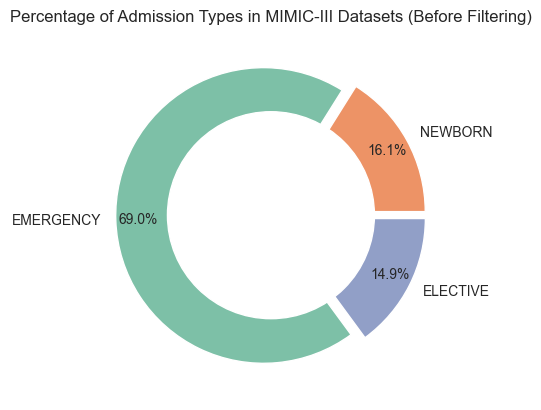

In [3]:
import matplotlib.pyplot as plt

mimic_admissions = pd.read_csv('../data/mimic/ADMISSIONS.csv')
mimic_admissions['ADMISSION_TYPE'] = mimic_admissions['ADMISSION_TYPE'].replace('URGENT', 'EMERGENCY')
unique_admission_types = mimic_admissions['ADMISSION_TYPE'].unique()
admission_type_length = []
for type in unique_admission_types:
    mimic_admission_type_data = mimic_admissions[mimic_admissions['ADMISSION_TYPE'] == type]
    mimic_admission_patients = mimic_admission_type_data['SUBJECT_ID'].unique()
    admission_type_length.append(len(mimic_admission_patients))
    print(f"Admission Type: {type}, Length: {len(mimic_admission_patients)}")

# colors
colors = ["#ed9366", "#7dc0a7", "#919fc7"]

explode = (0.05, 0.05, 0.05)

# Pie Chart
_, _, autotexts = plt.pie(admission_type_length, colors=colors, labels=unique_admission_types,
                          autopct='%1.1f%%', pctdistance=0.85, explode=explode)

# for i, a in enumerate(autotexts):
#     a.set_text("{}".format(admission_type_length[i]))
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Percentage of Admission Types in MIMIC-III Datasets (Before Filtering)')

# Displaying Chart
plt.show()

Admission Type: NEWBORN, Length: 0
Admission Type: EMERGENCY, Length: 4350
Admission Type: ELECTIVE, Length: 997


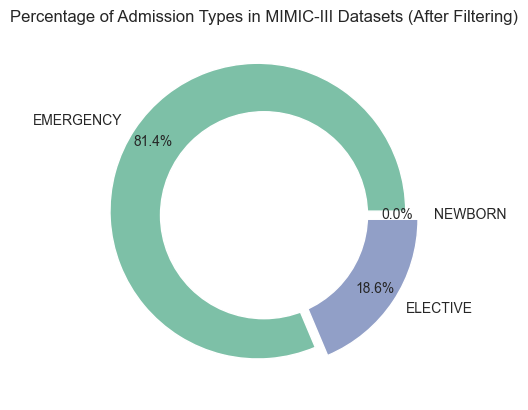

In [4]:
import matplotlib.pyplot as plt

mimic_patients = mimic_data['patientunitstayid'].unique()

mimic_admissions = pd.read_csv('../data/mimic/ADMISSIONS.csv')
mimic_admissions['ADMISSION_TYPE'] = mimic_admissions['ADMISSION_TYPE'].replace('URGENT', 'EMERGENCY')
unique_admission_types = mimic_admissions['ADMISSION_TYPE'].unique()
admission_type_length = []
for type in unique_admission_types:
    mimic_admission_type_data = mimic_admissions[mimic_admissions['ADMISSION_TYPE'] == type]
    mimic_admission_patients = mimic_admission_type_data['SUBJECT_ID'].unique()
    mimic_admission_patients = set(mimic_admission_patients).intersection(set(mimic_patients))
    admission_type_length.append(len(mimic_admission_patients))
    print(f"Admission Type: {type}, Length: {len(mimic_admission_patients)}")

# colors
colors = ["#ed9366", "#7dc0a7", "#919fc7"]

explode = (0.05, 0.05, 0.05)

# Pie Chart
_, _, autotexts = plt.pie(admission_type_length, colors=colors, labels=unique_admission_types,
                          autopct='%1.1f%%', pctdistance=0.85, explode=explode)

# for i, a in enumerate(autotexts):
#     a.set_text("{}".format(admission_type_length[i]))
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Percentage of Admission Types in MIMIC-III Datasets (After Filtering)')

# Displaying Chart
plt.show()

# K-Means Clustering

In [5]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

import numpy as np

eicu_mimic = mimic_data.to_numpy()

def draw_mimic_umap(x, n_neighbors, min_dist, title):

    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
                        random_state=np.random.RandomState(25),
                        transform_seed=np.random.RandomState(25))
    principal_components = reducer.fit_transform(x)
    print(principal_components.shape)
    print(eicu.to_numpy()[:, -20:-12].shape)

    final_np = principal_components
    print(final_np.shape)

    plt.figure(figsize=(6, 5))

    palette = [
        '#ff3333',   # Red
        '#008000',   # Dark Green
        '#808080',   # Grey
    ]
    colors = sns.color_palette(palette, n_colors=8)
    legend_elements = []

    # final_eicu_np = final_np[final_np[:, -1] != -1]
    # final_mimic_np = final_np[final_np[:, -1] == -1]
    # final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
    # final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

    plot = plt.scatter(final_np[:, 0], final_np[:, 1], label="MIMIC", color="#ff3333", alpha=0.5, s=1.2)
    legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#ff3333", markersize=8, label="MIMIC")
    legend_elements.append(legend_element)
    # 
    # plot = plt.scatter(final_mimic_young[:, 0], final_mimic_young[:, 1], label="MIMIC < 30", color="#ff3333", alpha=0.1, s=1.2)
    # legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#ff3333", markersize=8, label="MIMIC < 30")
    # legend_elements.append(legend_element)
    # 
    # plot = plt.scatter(final_mimic_old[:, 0], final_mimic_old[:, 1], label="MIMIC >= 30", color="#008000", alpha=0.1, s=1.2)
    # legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#008000", markersize=8, label="MIMIC >= 30")
    # legend_elements.append(legend_element)

    plt.title(title)
    # plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.grid(True)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()

    return final_np

/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(5000, 2)
(39755, 8)
(5000, 2)


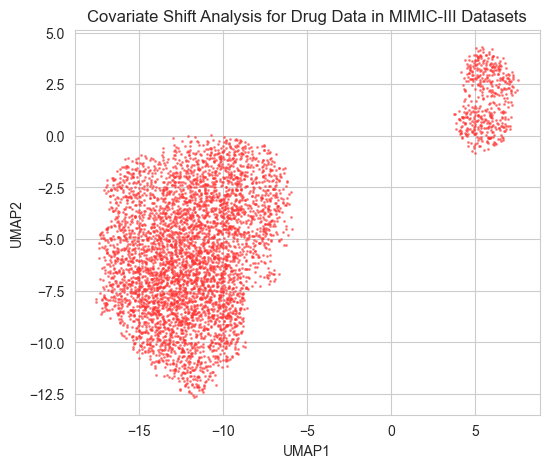

In [6]:
eicu_mimic_drugs = eicu_mimic[:, 3:-31]

final_np = draw_mimic_umap(eicu_mimic_drugs, 10, 0.9, title="Covariate Shift Analysis for Drug Data in MIMIC-III Datasets")

/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


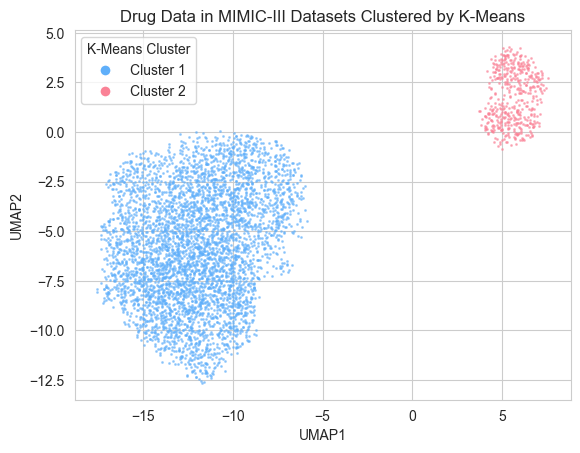

In [7]:
# Use k-means to cluster the data
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(final_np)

legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

cluster_1 = final_np[clusters == 0]
cluster_2 = final_np[clusters == 1]

plot = plt.scatter(cluster_1[:, 0], cluster_1[:, 1], label="Cluster 1", color="#5faffa", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#5faffa", markersize=8, label="Cluster 1")
legend_elements.append(legend_element)

plot = plt.scatter(cluster_2[:, 0], cluster_2[:, 1], label="Cluster 2", color="#fa8296", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa8296", markersize=8, label="Cluster 2")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Clustered by K-Means')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title="K-Means Cluster", handles=legend_elements)
plt.show()

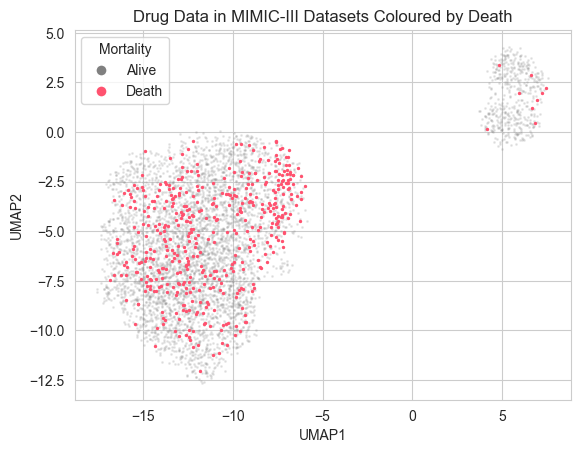

In [9]:
legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

cluster_1 = final_np[mimic_data["death"] == 0]
cluster_2 = final_np[mimic_data["death"] == 1]

plot = plt.scatter(cluster_1[:, 0], cluster_1[:, 1], label="Alive", color="#808080", alpha=0.15, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="Alive")
legend_elements.append(legend_element)

plot = plt.scatter(cluster_2[:, 0], cluster_2[:, 1], label="Death", color="#ff526f", alpha=1.0, s=2.0)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#ff526f", markersize=8, label="Death")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Death')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title="Mortality", handles=legend_elements)
plt.show()

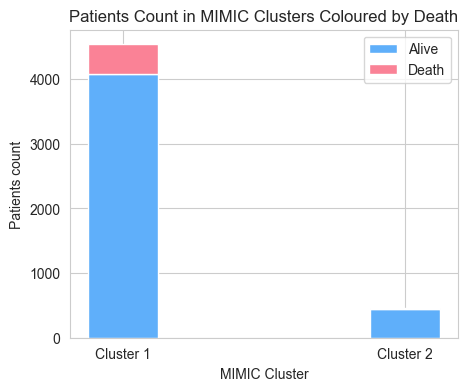

In [10]:
import matplotlib.pyplot as plt

mimic_cluster_1 = mimic_data[clusters == 0]
mimic_cluster_2 = mimic_data[clusters == 1]

# death, alive = calculate_death_alive_count("death")
# print("Death patients: ", death)
# print("Alive patients: ", alive)

mimic_cluster_1_death = mimic_cluster_1[mimic_cluster_1["death"] == 1]
mimic_cluster_1_death_count = len(mimic_cluster_1_death["patientunitstayid"].unique())

mimic_cluster_1_alive = mimic_cluster_1[mimic_cluster_1["death"] == 0]
mimic_cluster_1_alive_count = len(mimic_cluster_1_alive["patientunitstayid"].unique())

mimic_cluster_2_death = mimic_cluster_2[mimic_cluster_2["death"] == 1]
mimic_cluster_2_death_count = len(mimic_cluster_2_death["patientunitstayid"].unique())

mimic_cluster_2_alive = mimic_cluster_2[mimic_cluster_2["death"] == 0]
mimic_cluster_2_alive_count = len(mimic_cluster_2_alive["patientunitstayid"].unique())

death = [mimic_cluster_1_death_count, mimic_cluster_2_death_count]
alive = [mimic_cluster_1_alive_count, mimic_cluster_2_alive_count]

selected_hospital_labels = ["Cluster 1", "Cluster 2"]

plt.figure(figsize=(5, 4))
plt.title("Patients Count in MIMIC Clusters Coloured by Death")
plt.bar(selected_hospital_labels, alive, label='Alive', color="#5faffa", width=0.25)
plt.bar(selected_hospital_labels, death, bottom=alive, label='Death', color="#fa8296", width=0.25)
plt.legend()
plt.xlabel("MIMIC Cluster")
plt.ylabel("Patients count")
plt.show()

In [11]:
eicu_time = pd.read_csv("../data/eicu_mimic_lab_time.csv")
mimic_ventilator_patients = (eicu_time[(eicu_time["hospitalid"] == -1) & (eicu_time["ventilator"] == 1)])["patientunitstayid"].unique()
mimic_sepsis_patients = (eicu_time[(eicu_time["hospitalid"] == -1) & (eicu_time["sepsis"] == 1)])["patientunitstayid"].unique()

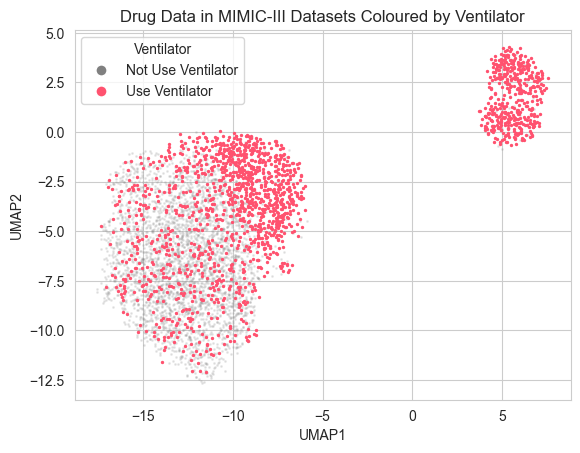

In [12]:
legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

cluster_1 = final_np[~np.isin(mimic_data["patientunitstayid"].to_numpy(), mimic_ventilator_patients)]
cluster_2 = final_np[np.isin(mimic_data["patientunitstayid"].to_numpy(), mimic_ventilator_patients)]

plot = plt.scatter(cluster_1[:, 0], cluster_1[:, 1], label="Not Use Ventilator", color="#808080", alpha=0.15, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="Not Use Ventilator")
legend_elements.append(legend_element)

plot = plt.scatter(cluster_2[:, 0], cluster_2[:, 1], label="Use Ventilator", color="#ff526f", alpha=1.0, s=2.0)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#ff526f", markersize=8, label="Use Ventilator")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Ventilator')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title="Ventilator", handles=legend_elements)
plt.show()

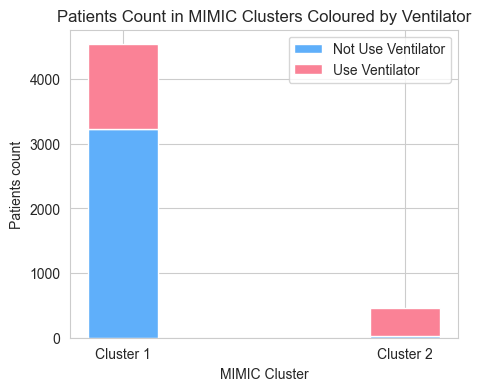

In [13]:
import matplotlib.pyplot as plt

mimic_cluster_1 = mimic_data[clusters == 0]
mimic_cluster_2 = mimic_data[clusters == 1]

# ventilator, not_ventilator = calculate_ventilator_not_ventilator_count("ventilator")
# print("ventilator patients: ", ventilator)
# print("not_ventilator patients: ", not_ventilator)

mimic_cluster_1_ventilator = mimic_cluster_1[mimic_cluster_1["patientunitstayid"].isin(mimic_ventilator_patients)]
mimic_cluster_1_ventilator_count = len(mimic_cluster_1_ventilator["patientunitstayid"].unique())

mimic_cluster_1_not_ventilator = mimic_cluster_1[~mimic_cluster_1["patientunitstayid"].isin(mimic_ventilator_patients)]
mimic_cluster_1_not_ventilator_count = len(mimic_cluster_1_not_ventilator["patientunitstayid"].unique())

mimic_cluster_2_ventilator = mimic_cluster_2[mimic_cluster_2["patientunitstayid"].isin(mimic_ventilator_patients)]
mimic_cluster_2_ventilator_count = len(mimic_cluster_2_ventilator["patientunitstayid"].unique())

mimic_cluster_2_not_ventilator = mimic_cluster_2[~mimic_cluster_2["patientunitstayid"].isin(mimic_ventilator_patients)]
mimic_cluster_2_not_ventilator_count = len(mimic_cluster_2_not_ventilator["patientunitstayid"].unique())

ventilator = [mimic_cluster_1_ventilator_count, mimic_cluster_2_ventilator_count]
not_ventilator = [mimic_cluster_1_not_ventilator_count, mimic_cluster_2_not_ventilator_count]

selected_hospital_labels = ["Cluster 1", "Cluster 2"]

plt.figure(figsize=(5, 4))
plt.title("Patients Count in MIMIC Clusters Coloured by Ventilator")
plt.bar(selected_hospital_labels, not_ventilator, label='Not Use Ventilator', color="#5faffa", width=0.25)
plt.bar(selected_hospital_labels, ventilator, bottom=not_ventilator, label='Use Ventilator', color="#fa8296", width=0.25)
plt.legend()
plt.xlabel("MIMIC Cluster")
plt.ylabel("Patients count")
plt.show()

(4889, 2)
(111, 2)


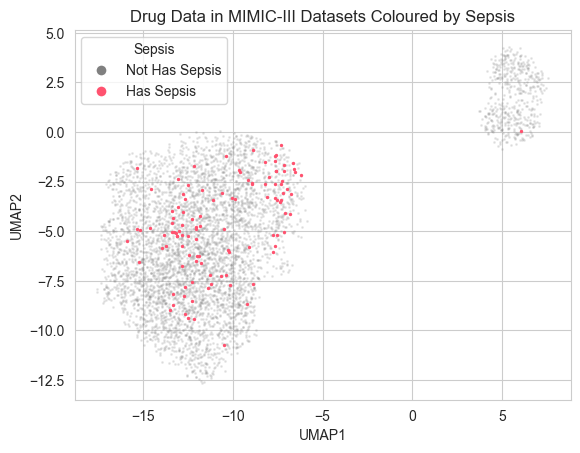

In [14]:
legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

cluster_1 = final_np[~np.isin(mimic_data["patientunitstayid"].to_numpy(), mimic_sepsis_patients)]
cluster_2 = final_np[np.isin(mimic_data["patientunitstayid"].to_numpy(), mimic_sepsis_patients)]

print(cluster_1.shape)
print(cluster_2.shape)

plot = plt.scatter(cluster_1[:, 0], cluster_1[:, 1], label="Not Has Sepsis", color="#808080", alpha=0.15, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="Not Has Sepsis")
legend_elements.append(legend_element)

plot = plt.scatter(cluster_2[:, 0], cluster_2[:, 1], label="Has Sepsis", color="#ff526f", alpha=1.0, s=2.0)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#ff526f", markersize=8, label="Has Sepsis")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Sepsis')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title="Sepsis", handles=legend_elements)
plt.show()

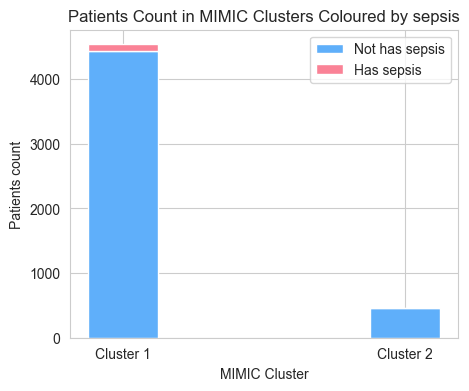

In [15]:
import matplotlib.pyplot as plt

mimic_cluster_1 = mimic_data[clusters == 0]
mimic_cluster_2 = mimic_data[clusters == 1]

# sepsis, not_sepsis = calculate_sepsis_not_sepsis_count("sepsis")
# print("sepsis patients: ", sepsis)
# print("not_sepsis patients: ", not_sepsis)

mimic_cluster_1_sepsis = mimic_cluster_1[mimic_cluster_1["patientunitstayid"].isin(mimic_sepsis_patients)]
mimic_cluster_1_sepsis_count = len(mimic_cluster_1_sepsis["patientunitstayid"].unique())

mimic_cluster_1_not_sepsis = mimic_cluster_1[~mimic_cluster_1["patientunitstayid"].isin(mimic_sepsis_patients)]
mimic_cluster_1_not_sepsis_count = len(mimic_cluster_1_not_sepsis["patientunitstayid"].unique())

mimic_cluster_2_sepsis = mimic_cluster_2[mimic_cluster_2["patientunitstayid"].isin(mimic_sepsis_patients)]
mimic_cluster_2_sepsis_count = len(mimic_cluster_2_sepsis["patientunitstayid"].unique())

mimic_cluster_2_not_sepsis = mimic_cluster_2[~mimic_cluster_2["patientunitstayid"].isin(mimic_sepsis_patients)]
mimic_cluster_2_not_sepsis_count = len(mimic_cluster_2_not_sepsis["patientunitstayid"].unique())

sepsis = [mimic_cluster_1_sepsis_count, mimic_cluster_2_sepsis_count]
not_sepsis = [mimic_cluster_1_not_sepsis_count, mimic_cluster_2_not_sepsis_count]

selected_hospital_labels = ["Cluster 1", "Cluster 2"]

plt.figure(figsize=(5, 4))
plt.title("Patients Count in MIMIC Clusters Coloured by sepsis")
plt.bar(selected_hospital_labels, not_sepsis, label='Not has sepsis', color="#5faffa", width=0.25)
plt.bar(selected_hospital_labels, sepsis, bottom=not_sepsis, label='Has sepsis', color="#fa8296", width=0.25)
plt.legend()
plt.xlabel("MIMIC Cluster")
plt.ylabel("Patients count")
plt.show()

In [16]:
mimic_cluster_1 = mimic_data[clusters == 0]
mimic_cluster_2 = mimic_data[clusters == 1]

In [17]:
mimic_cluster_2_patients_set = set(mimic_cluster_2['patientunitstayid'].unique())

eicu_2 = eicu.copy()
eicu_2.loc[eicu_2["patientunitstayid"].isin(mimic_cluster_2_patients_set), 'hospitalid'] = -2.0
eicu_2.to_csv("../data/eicu_mimic_drug_lab_2.csv", index=False)
eicu_2.head()

,patientunitstayid,hospitalid,death,acetamin,biotene,compazine,ferrous,imdur,lidocaine,milk of magnesia,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,85639.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147597,0.427789,0.0,0.0,1.288533,2.557923,2.204273,2.191031,-1.555455,0.0
1,82621.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.012631,0.267391,0.0,0.0,-0.658234,-0.709963,-0.789680,-0.727193,-0.874577,0.0
2,45639.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,-0.342786,-1.382652,0.104037,0.000000,-0.369941,0.0
3,52592.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.0,0.0,-0.559093,-0.516955,-0.432193,0.000000,0.810501,0.0
4,51703.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.525502,-0.011561,0.0,0.0,-0.207594,0.485928,0.000000,-0.620861,-0.444749,0.0


In [18]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

import numpy as np

mimic_drugs = (mimic_data.to_numpy())[:, 3:-31]
mimic_ids = (mimic_data.to_numpy())[:, 1]

def draw_mimic_umap(x, n_neighbors, min_dist, title):

    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
                        random_state=np.random.RandomState(25),
                        transform_seed=np.random.RandomState(25))
    principal_components = reducer.fit_transform(x)
    print(principal_components.shape)
    print(eicu.to_numpy()[:, -20:-12].shape)

    # final_np = principal_components
    

    final_np = np.hstack((principal_components, mimic_ids[:, None]))
    print(final_np.shape)
    print(final_np.shape)

    plt.figure(figsize=(6, 5))

    palette = [
        '#ff3333',   # Red
        '#008000',   # Dark Green
        '#808080',   # Grey
    ]
    colors = sns.color_palette(palette, n_colors=8)
    legend_elements = []

    print(np.unique(final_np[:, 2]))

    for id, hospital_id in enumerate(list(np.unique(final_np[:, 2]))):

        color = colors[id]

        print("id: {} hospital id: {}, color: {}".format(id, hospital_id, color))

        scatter_rows = final_np[np.where(final_np[:, 2] == hospital_id)]

        if hospital_id == -1:
            hospital_label = "mimic cluster 1"
        else:
            hospital_label = "mimic cluster 2"

        plot = plt.scatter(scatter_rows[:, 0], scatter_rows[:, 1], label=hospital_label, color=color, alpha=0.5, s=1.2)
        legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=hospital_label)
        legend_elements.append(legend_element)

    plt.title(title)
    plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.grid(True)
    plt.show()

/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(5000, 2)
(39755, 8)
(5000, 3)
(5000, 3)
[-1.]
id: 0 hospital id: -1.0, color: (1.0, 0.2, 0.2)


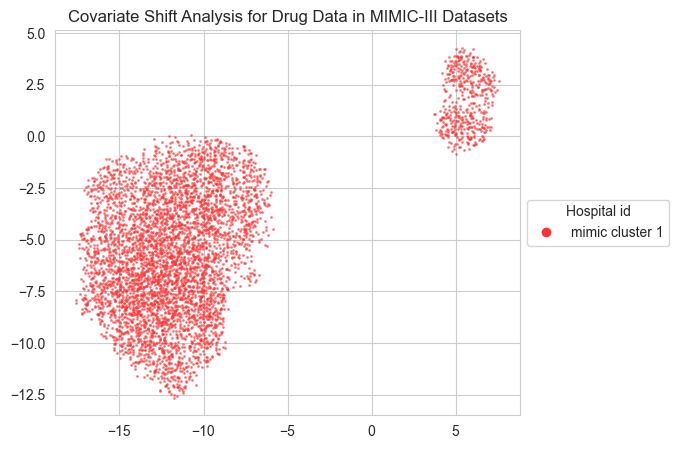

In [19]:
draw_mimic_umap(mimic_drugs, 10, 0.9, title="Covariate Shift Analysis for Drug Data in MIMIC-III Datasets")

In [20]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

def draw_mimic_umap(x, mimic_ids, n_neighbors, min_dist, title):

    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
                        random_state=np.random.RandomState(25),
                        transform_seed=np.random.RandomState(25))
    principal_components = reducer.fit_transform(x)
    print(principal_components.shape)

    final_np = np.hstack((principal_components, mimic_ids[:, None]))
    print(final_np.shape)

    plt.figure(figsize=(6, 5))

    palette = [
        '#ff3333',   # Red
        '#ff7d52',   # Orange Red
        '#ffcc00',   # Gold Yellow
        '#6cf56c',   # Fresh Green
        '#008000',   # Dark Green
        '#00cccc',   # Dark Turquoise
        '#325bfa',   # Royal Blue
        '#6633cc',   # Blue Violet
        '#808080',   # Grey
        '#ff66ba',    # Deep Pink
        '#c9581a',    # Brown
        '#d18cff'    # Light Purple
    ]
    colors = sns.color_palette(palette, n_colors=12)
    legend_elements = []

    # mimic_scatter_rows = final_np[np.where(final_np[:, 2] == -1)]
    # mimic_plot = plt.scatter(mimic_scatter_rows[:, 0], mimic_scatter_rows[:, 1], label="MIMIC", color="#6633cc", alpha=0.15, s=1.2)
    # mimic_legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#6633cc", markersize=8, label="MIMIC")
    # legend_elements.append(mimic_legend_element)
    #
    # eicu_scatter_rows = final_np[np.where(final_np[:, 2] != -1)]
    # eicu_plot = plt.scatter(eicu_scatter_rows[:, 0], eicu_scatter_rows[:, 1], label="eICU", color="#a6a6a6", alpha=0.05, s=1.2)
    # eicu_legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#a6a6a6", markersize=8, label="eICU")
    # legend_elements.append(eicu_legend_element)
    
    print(list(np.unique(final_np[:, 2])))

    for id, hospital_id in enumerate(list(np.unique(final_np[:, 2]))):

        

        color = colors[id]

        print("id: {} hospital id: {}, color: {}".format(id, hospital_id, color))

        scatter_rows = final_np[np.where(final_np[:, 2] == hospital_id)]

        if hospital_id == -1:
            hospital_label = "mimic"
        elif hospital_id == -2:
            hospital_label = "mimic_2"
        else:
            hospital_label = int(hospital_id)

        plot = plt.scatter(scatter_rows[:, 0], scatter_rows[:, 1], label=hospital_label, color=color, alpha=0.1, s=1.2)
        legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=hospital_label)
        legend_elements.append(legend_element)

    plt.title(title)
    plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.grid(True)
    plt.show()

    return final_np

/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(39755, 2)
(39755, 3)
[-1.0, 148.0, 165.0, 167.0, 199.0, 252.0, 281.0, 283.0, 420.0, 449.0, 458.0]
id: 0 hospital id: -1.0, color: (1.0, 0.2, 0.2)
id: 1 hospital id: 148.0, color: (1.0, 0.49019607843137253, 0.3215686274509804)
id: 2 hospital id: 165.0, color: (1.0, 0.8, 0.0)
id: 3 hospital id: 167.0, color: (0.4235294117647059, 0.9607843137254902, 0.4235294117647059)
id: 4 hospital id: 199.0, color: (0.0, 0.5019607843137255, 0.0)
id: 5 hospital id: 252.0, color: (0.0, 0.8, 0.8)
id: 6 hospital id: 281.0, color: (0.19607843137254902, 0.3568627450980392, 0.9803921568627451)
id: 7 hospital id: 283.0, color: (0.4, 0.2, 0.8)
id: 8 hospital id: 420.0, color: (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)
id: 9 hospital id: 449.0, color: (1.0, 0.4, 0.7294117647058823)
id: 10 hospital id: 458.0, color: (0.788235294117647, 0.34509803921568627, 0.10196078431372549)


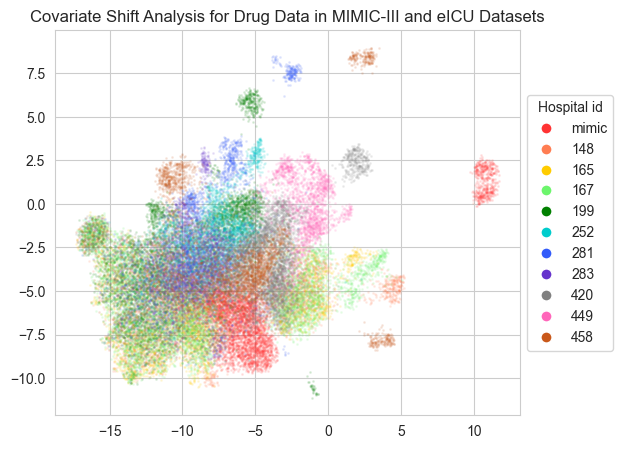

array([[-6.10823059e+00, -6.79989862e+00, -1.00000000e+00],
       [ 1.05288515e+01,  1.53803313e+00, -1.00000000e+00],
       [-1.21136255e+01, -5.54196167e+00, -1.00000000e+00],
       ...,
       [-2.75331467e-01,  4.43428755e-01,  4.49000000e+02],
       [-3.08681607e+00,  1.92399681e+00,  4.49000000e+02],
       [-5.57704449e-01, -8.26791406e-01,  4.49000000e+02]])

In [21]:
eicu_np = eicu.to_numpy()
eicu_mimic_drugs = eicu_np[:, 3:-31]
mimic_ids = eicu_np[:, 1]

draw_mimic_umap(eicu_mimic_drugs, mimic_ids, 10, 0.9, title="Covariate Shift Analysis for Drug Data in MIMIC-III and eICU Datasets")

In [22]:
# eicu_mimic_2 = eicu_2.to_numpy()
# eicu_mimic_drugs_2 = eicu_mimic_2[:, 3:-31]
# mimic_ids_2 = eicu_mimic_2[:, 1]
# 
# final_np = draw_mimic_umap(eicu_mimic_drugs_2, mimic_ids_2, 10, 0.9, title="Covariate Shift Analysis for Drug Data in MIMIC-III and eICU Datasets")

In [23]:
eicu_mimic.shape

(5000, 271)

# Calculate Fisher test

In [24]:
from scipy.stats import fisher_exact

def fisher_test(A, B):
    
    # Test the odds of the event happening in Cluster 2 (A) is greater than in Cluster 1 (B)
    # A should be the small cluster, B should be the large cluster
    #               | Took drug | Not took drug |
    #      -----------------------------
    # Cluster 2 (A) |     20    |       5       |
    # Cluster 1 (B) |     15    |      10       |
    
    # Calculate values for the contingency table
    table = [[sum(A), len(A) - sum(A)],
             [sum(B), len(B) - sum(B)]]

    # Perform Fisher's exact test
    odds_ratio, p_value = fisher_exact(table, alternative='greater')
    
    return p_value

# Loop All Variables

## Drug Features

In [25]:
drug_features = mimic_data.columns[3:-31]
drug_p_value_list = []
for feature in drug_features:
    
    A = mimic_cluster_2[feature].to_numpy()
    B = mimic_cluster_1[feature].to_numpy()
    
    p_value = fisher_test(A, B) + 1e-300
    drug_p_value_list.append(p_value)
    
    print(f"Feature: {feature}, P-Value: {p_value}")

Feature: acetamin, P-Value: 4.5578350759346625e-70
Feature: biotene, P-Value: 1.0
Feature: compazine, P-Value: 1.0
Feature: ferrous, P-Value: 0.9398736349155397
Feature: imdur, P-Value: 1.0
Feature: lidocaine, P-Value: 3.0138127712837658e-204
Feature: milk of magnesia, P-Value: 1e-300
Feature: nystatin, P-Value: 0.9999949020640639
Feature: prochlorperazine, P-Value: 0.999999999992789
Feature: tamsulosin, P-Value: 0.028912376740904158
Feature: advair diskus, P-Value: 0.05453204817283497
Feature: bisacodyl, P-Value: 5.485368633054712e-06
Feature: coreg, P-Value: 1.0
Feature: flagyl, P-Value: 1.0
Feature: influenza vac, P-Value: 0.000579567558815444
Feature: lipitor, P-Value: 1.0
Feature: mineral, P-Value: 0.9794558656008299
Feature: omeprazole, P-Value: 0.9187873027488598
Feature: promethazine, P-Value: 0.9998719152142672
Feature: thiamine, P-Value: 0.9985965296529276
Feature: albumin, P-Value: 1.2994818020846149e-110
Feature: bumetanide, P-Value: 0.3191120303557624
Feature: cozaar, P-Va

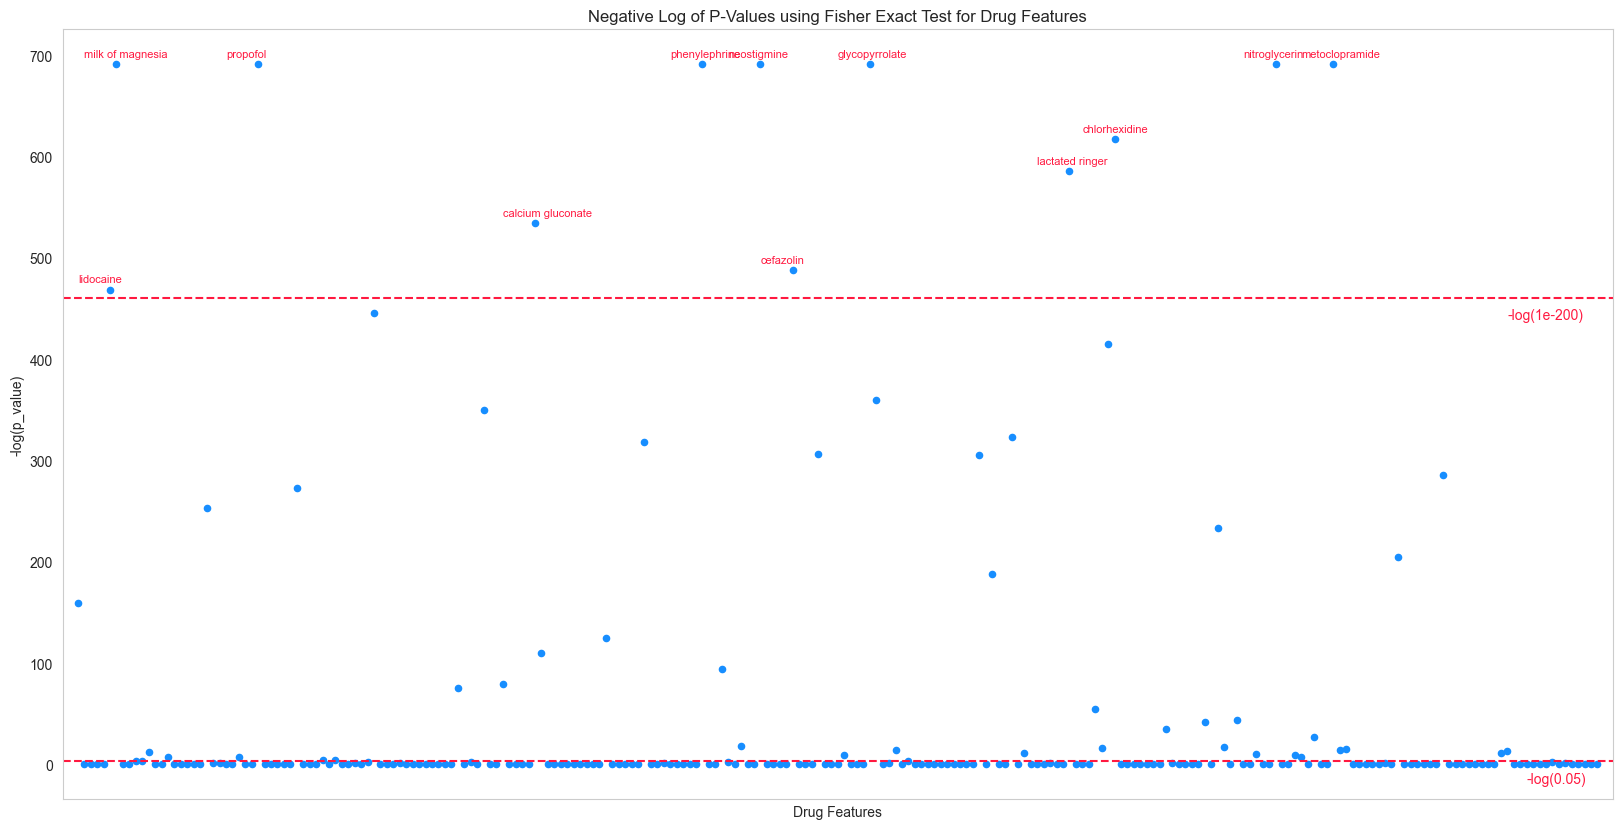

In [26]:
neg_log_p_values = [-np.log(p) for p in drug_p_value_list]

plt.figure(figsize=(20, 10))
plt.scatter(list(drug_features), neg_log_p_values, s=20, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Drug Features')
plt.ylabel('-log(p_value)')
plt.xlabel('Drug Features')
plt.xticks([])  # Hiding y-axis tick labels
plt.grid(False)
plt.margins(x=0.01)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(drug_features) - 12, critical_value - 10, '-log(0.05)', verticalalignment='top', color='#ff1940')

very_critical_value = -np.log(1e-200)
plt.axhline(y=very_critical_value, color='#ff1940', linestyle='--')
plt.text(len(drug_features) - 15, very_critical_value - 10, '-log(1e-200)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > very_critical_value else 'black' for p_value in neg_log_p_values]

for i, (x, feature) in enumerate(zip(range(len(drug_features)), drug_features)):
    if neg_log_p_values[i] > very_critical_value:
        plt.text(x - 5, neg_log_p_values[i] + 10, feature, verticalalignment='center', color='#ff1940', fontsize=8)
    
plt.show()

(616, 2)
(4384, 2)


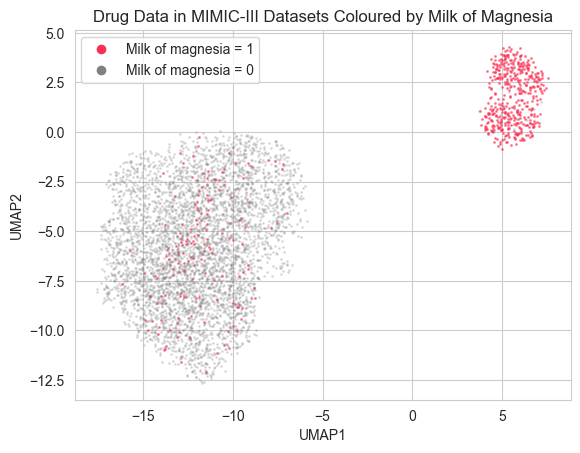

In [27]:
legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

final_pos_np = final_np[mimic_data['milk of magnesia'].to_numpy() == 1]
final_neg_np = final_np[mimic_data['milk of magnesia'].to_numpy() == 0]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="Milk of magnesia = 1", color="#fa2f51", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa2f51", markersize=8, label="Milk of magnesia = 1")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="Milk of magnesia = 0", color="#808080", alpha=0.2, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="Milk of magnesia = 0")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Milk of Magnesia')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=legend_elements)
plt.show()

(879, 2)
(4121, 2)


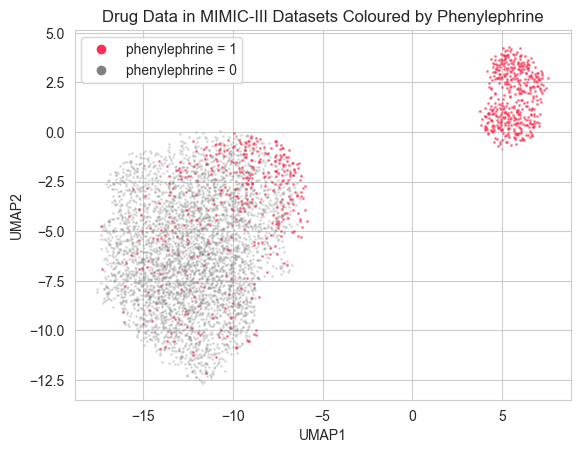

In [28]:
legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

final_pos_np = final_np[mimic_data['phenylephrine'].to_numpy() == 1]
final_neg_np = final_np[mimic_data['phenylephrine'].to_numpy() == 0]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="phenylephrine = 1", color="#fa2f51", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa2f51", markersize=8, label="phenylephrine = 1")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="phenylephrine = 0", color="#808080", alpha=0.2, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="phenylephrine = 0")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Phenylephrine')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=legend_elements)
plt.show()

(472, 2)
(4528, 2)


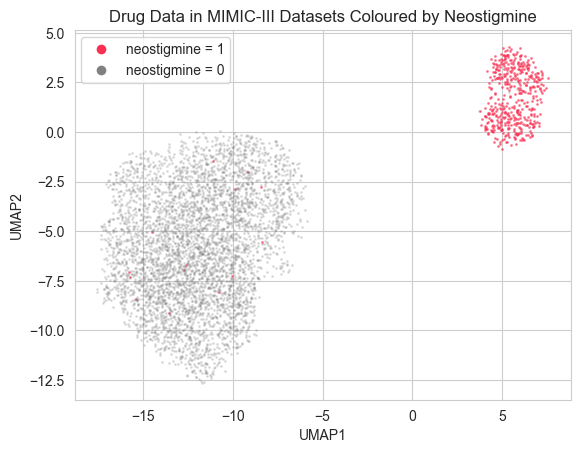

In [29]:
legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

final_pos_np = final_np[mimic_data['neostigmine'].to_numpy() == 1]
final_neg_np = final_np[mimic_data['neostigmine'].to_numpy() == 0]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="neostigmine = 1", color="#fa2f51", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa2f51", markersize=8, label="neostigmine = 1")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="neostigmine = 0", color="#808080", alpha=0.2, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="neostigmine = 0")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Neostigmine')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=legend_elements)
plt.show()

(487, 2)
(4513, 2)


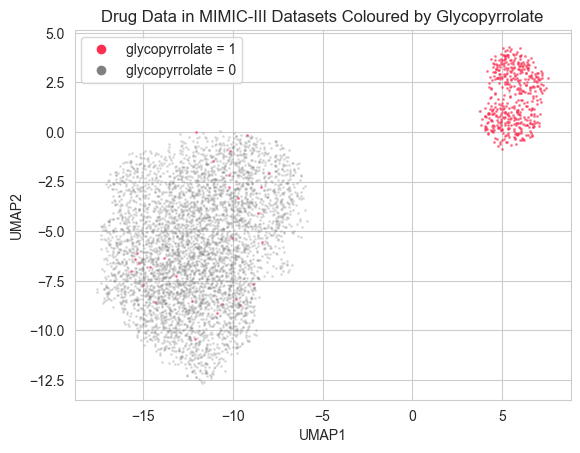

In [30]:
legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

final_pos_np = final_np[mimic_data['glycopyrrolate'].to_numpy() == 1]
final_neg_np = final_np[mimic_data['glycopyrrolate'].to_numpy() == 0]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="glycopyrrolate = 1", color="#fa2f51", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa2f51", markersize=8, label="glycopyrrolate = 1")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="glycopyrrolate = 0", color="#808080", alpha=0.2, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="glycopyrrolate = 0")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Glycopyrrolate')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=legend_elements)
plt.show()

(820, 2)
(4180, 2)


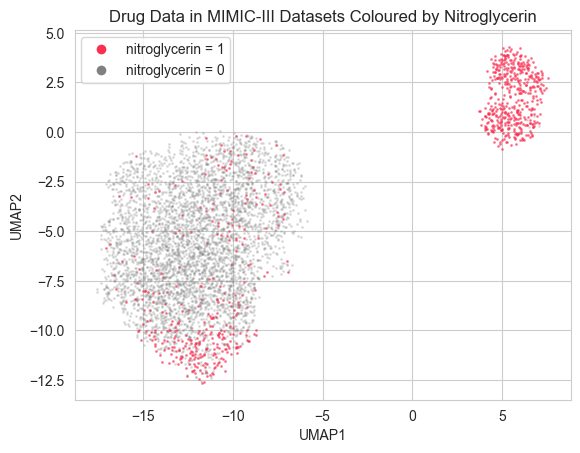

In [31]:
legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

final_pos_np = final_np[mimic_data['nitroglycerin'].to_numpy() == 1]
final_neg_np = final_np[mimic_data['nitroglycerin'].to_numpy() == 0]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="nitroglycerin = 1", color="#fa2f51", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa2f51", markersize=8, label="nitroglycerin = 1")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="nitroglycerin = 0", color="#808080", alpha=0.2, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="nitroglycerin = 0")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Nitroglycerin')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=legend_elements)
plt.show()

(586, 2)
(4414, 2)


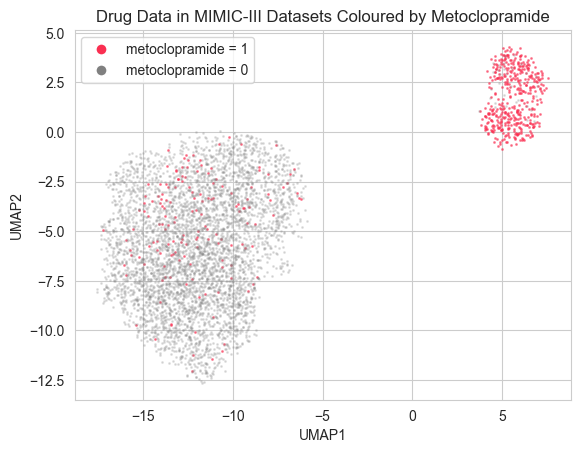

In [32]:
legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

final_pos_np = final_np[mimic_data['metoclopramide'].to_numpy() == 1]
final_neg_np = final_np[mimic_data['metoclopramide'].to_numpy() == 0]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="metoclopramide = 1", color="#fa2f51", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa2f51", markersize=8, label="metoclopramide = 1")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="metoclopramide = 0", color="#808080", alpha=0.2, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="metoclopramide = 0")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Metoclopramide')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=legend_elements)
plt.show()

## Age Features

In [33]:
age_features = mimic_data.columns[-20:-12]
age_p_value_list = []
for feature in age_features:
    
    A = mimic_cluster_2[feature].to_numpy()
    B = mimic_cluster_1[feature].to_numpy()
    
    p_value = fisher_test(A, B)
    age_p_value_list.append(p_value)
    
    print(f"Feature: {feature}, P-Value: {p_value}")

Feature: < 30, P-Value: 0.9999996915577253
Feature: 30 - 39, P-Value: 0.9840596570339991
Feature: 40 - 49, P-Value: 0.9984600540091594
Feature: 50 - 59, P-Value: 0.2093434001723173
Feature: 60 - 69, P-Value: 9.030092066062664e-08
Feature: 70 - 79, P-Value: 8.50164346174376e-05
Feature: 80 - 89, P-Value: 0.9994784834494996
Feature: > 89, P-Value: 0.9999995447478564


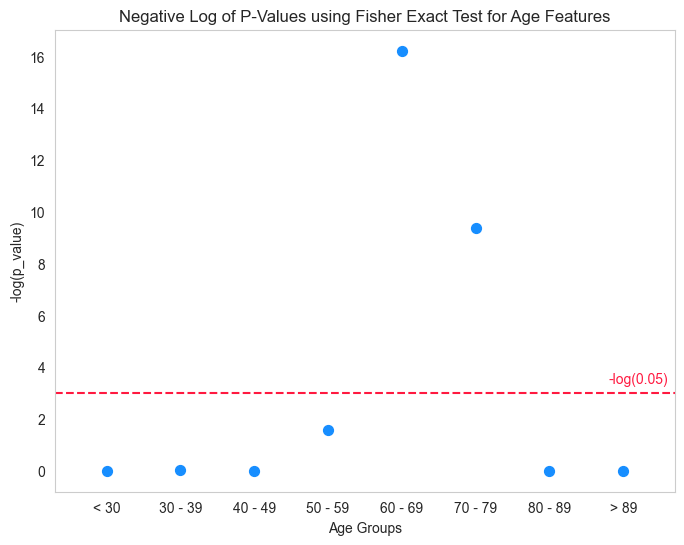

In [34]:
neg_log_p_values = [-np.log(p) for p in age_p_value_list]

plt.figure(figsize=(8, 6))
plt.scatter(list(age_features), neg_log_p_values, s=50, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Age Features')
plt.ylabel('-log(p_value)')
plt.xlabel('Age Groups')
plt.grid(False)
plt.margins(x=0.1)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(age_features) - 1.2, critical_value + 0.8, '-log(0.05)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > very_critical_value else 'black' for p_value in neg_log_p_values]

for i, (x, feature) in enumerate(zip(range(len(age_features)), age_features)):
    if neg_log_p_values[i] > very_critical_value:
        plt.text(x - 5, neg_log_p_values[i] + 10, feature, verticalalignment='center', color='#ff1940', fontsize=8)
    
plt.show()

## Admission Features

In [35]:
mimic_cluster_1

,patientunitstayid,hospitalid,death,acetamin,biotene,compazine,ferrous,imdur,lidocaine,milk of magnesia,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,85639.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147597,0.427789,0.000000,0.000000,1.288533,2.557923,2.204273,2.191031,-1.555455,0.0
2,45639.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.342786,-1.382652,0.104037,0.000000,-0.369941,0.0
3,52592.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,-0.559093,-0.516955,-0.432193,0.000000,0.810501,0.0
4,51703.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.525502,-0.011561,0.000000,0.000000,-0.207594,0.485928,0.000000,-0.620861,-0.444749,0.0
5,21399.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-2.271074,0.160644,0.000000,-1.103725,0.154787,-0.968423,0.000000,1.004494,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,80592.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-2.647659,-0.500060,0.000000,0.982097,-0.313540,-0.610936,-0.868970,1.297385,0.0
4996,5547.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.878146,-0.450911,1.085630,0.000000,-0.632483,1.091443,-0.968423,-0.479085,-0.527165,0.0
4997,27797.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.202065,1.118196,0.000000,0.000000,-0.721324,1.507734,-0.432193,-0.266421,0.220914,0.0
4998,95740.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.237574,0.030282,0.000000,0.744756,-0.910593,0.779224,-0.789680,0.158907,0.479571,0.0


In [36]:
mimic_admissions = pd.read_csv('../data/mimic/ADMISSIONS.csv')
mimic_admissions['ADMISSION_TYPE'] = mimic_admissions['ADMISSION_TYPE'].replace('URGENT', 'EMERGENCY')
unique_admission_types = mimic_admissions['ADMISSION_TYPE'].unique()

admission_type_p_value_list = []
for type in unique_admission_types:
    
    mimic_admission_type_data = mimic_admissions[mimic_admissions['ADMISSION_TYPE'] == type]
    mimic_admission_patients = mimic_admission_type_data['SUBJECT_ID'].unique()
    
    total_cluster_1 = len(mimic_cluster_1['patientunitstayid'].unique())
    total_cluster_2 = len(mimic_cluster_2['patientunitstayid'].unique())
    
    total_cluster_1_admissions = len(mimic_cluster_1[mimic_cluster_1['patientunitstayid'].isin(mimic_admission_patients)])
    total_cluster_2_admissions = len(mimic_cluster_2[mimic_cluster_2['patientunitstayid'].isin(mimic_admission_patients)])
    
    # table = [[total_cluster_1_admissions, total_cluster_1 - total_cluster_1_admissions],
    #          [total_cluster_2_admissions, total_cluster_2 - total_cluster_2_admissions]]
    
    table = [[total_cluster_2_admissions, total_cluster_2 - total_cluster_2_admissions],
             [total_cluster_1_admissions, total_cluster_1 - total_cluster_1_admissions]]

    _, p_value = fisher_exact(table, alternative='greater')
    admission_type_p_value_list.append(p_value)
    print(f"Admission Type: {type}, total_cluster_1_admissions: {total_cluster_1_admissions}, total_cluster_2_admissions: {total_cluster_2_admissions}, P-Value: {p_value}")

Admission Type: NEWBORN, total_cluster_1_admissions: 0, total_cluster_2_admissions: 0, P-Value: 1.0
Admission Type: EMERGENCY, total_cluster_1_admissions: 4189, total_cluster_2_admissions: 161, P-Value: 1.0
Admission Type: ELECTIVE, total_cluster_1_admissions: 666, total_cluster_2_admissions: 331, P-Value: 1.0210110084581214e-145


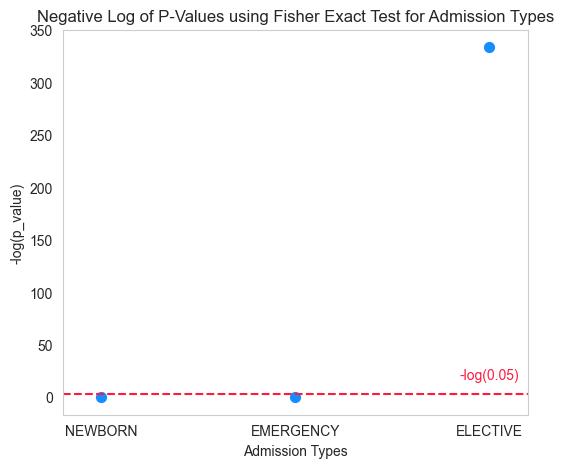

In [37]:
neg_log_p_values = [-np.log(p) for p in admission_type_p_value_list]

plt.figure(figsize=(6, 5))
plt.scatter(list(unique_admission_types), neg_log_p_values, s=50, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Admission Types')
plt.ylabel('-log(p_value)')
plt.xlabel('Admission Types')
plt.grid(False)
plt.margins(x=0.1)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(unique_admission_types) - 1.15, critical_value + 25, '-log(0.05)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > very_critical_value else 'black' for p_value in neg_log_p_values]
plt.show()

/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(4350, 2)
(650, 2)


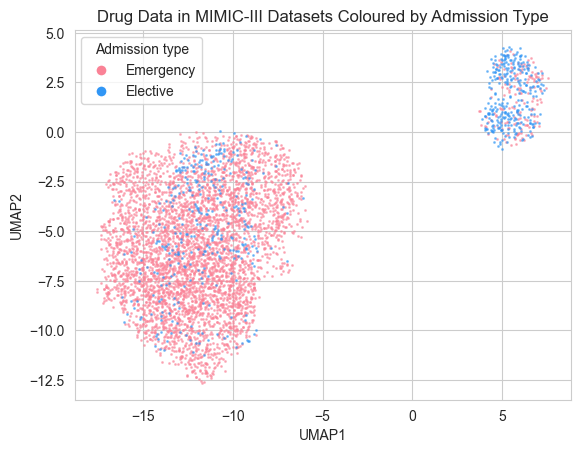

In [38]:
# Use k-means to cluster the data
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(final_np)

legend_elements = []

# final_eicu_np = final_np[final_np[:, -1] != -1]
# final_mimic_np = final_np[final_np[:, -1] == -1]
# final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
# final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]

mimic_admission_emergency = mimic_admissions[mimic_admissions['ADMISSION_TYPE'] == 'EMERGENCY']
mimic_emergency_patients = mimic_admission_emergency['SUBJECT_ID'].unique()

final_pos_np = final_np[np.isin(eicu_mimic[:, 0], mimic_emergency_patients)]
final_neg_np = final_np[~np.isin(eicu_mimic[:, 0], mimic_emergency_patients)]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="Emergency", color="#fa8296", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa8296", markersize=8, label="Emergency")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="Elective", color="#3196f5", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#3196f5", markersize=8, label="Elective")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Admission Type')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title="Admission type", handles=legend_elements)
plt.show()

In [39]:
eicu_mimic.shape

(5000, 271)

## Race Features

In [40]:
race_features = mimic_data.columns[-27:-22]
race_p_value_list = []
for feature in race_features:
    
    A = mimic_cluster_2[feature].to_numpy()
    B = mimic_cluster_1[feature].to_numpy()
    
    p_value = fisher_test(A, B)
    race_p_value_list.append(p_value)
    
    print(f"Feature: {feature}, P-Value: {p_value}")

Feature: race_african, P-Value: 0.9999999999236945
Feature: race_hispanic, P-Value: 0.9467129096453218
Feature: race_caucasion, P-Value: 2.022521537409174e-09
Feature: race_asian, P-Value: 0.8730699885165897
Feature: race_native, P-Value: 1.0


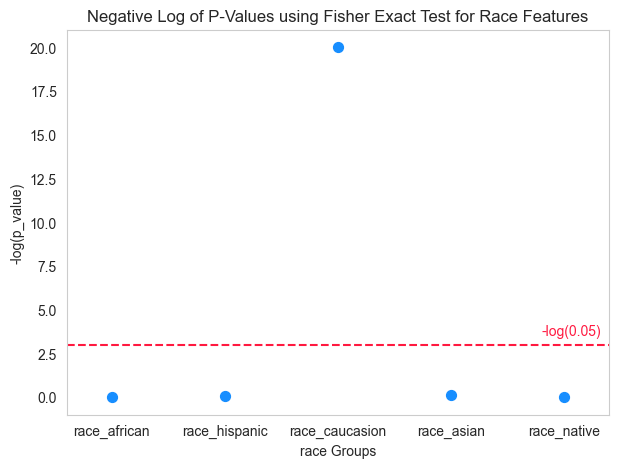

In [41]:
neg_log_p_values = [-np.log(p) for p in race_p_value_list]

plt.figure(figsize=(7, 5))
plt.scatter(list(race_features), neg_log_p_values, s=50, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Race Features')
plt.ylabel('-log(p_value)')
plt.xlabel('race Groups')
plt.grid(False)
plt.margins(x=0.1)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(race_features) - 1.2, critical_value + 1.2, '-log(0.05)', verticalalignment='top', color='#ff1940')

plt.show()

## Diagnosis Feature

In [42]:
import pandas as pd

mimic_admissions = pd.read_csv('../data/mimic/ADMISSIONS.csv')
mimic_admissions = mimic_admissions[mimic_admissions['SUBJECT_ID'].isin(mimic_data['patientunitstayid'].unique())]
mimic_admissions = mimic_admissions.sort_values('ADMITTIME').drop_duplicates('SUBJECT_ID', keep='last')
mimic_admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_IOEVENTS_DATA,HAS_CHARTEVENTS_DATA
54674,52357,79168,125272,2100-07-05 15:22:00,2100-07-27 17:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,Private,ENGL,CATHOLIC,MARRIED,WHITE,2100-07-05 11:40:00,2100-07-05 16:41:00,MALAISE S/P SLEEVE GASTRECTOMY,0,1,1
48868,50295,72723,146616,2100-07-09 10:43:00,2100-07-17 15:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2100-07-09 05:56:00,2100-07-09 15:55:00,ABDOMINAL PAIN;JAUNDICE,0,1,1
37943,38060,31288,136246,2100-07-16 11:29:00,2100-07-22 18:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,UNOBTAINABLE,WIDOWED,WHITE,2100-07-16 08:08:00,2100-07-16 12:20:00,INTRACRANIAL HEMORRHAGE,0,0,1
47863,48963,68501,139687,2100-07-26 07:15:00,2100-07-30 11:43:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,Medicare,ENGL,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,CAROTID STENOSIS/SDA,0,1,1
53196,54126,84686,131910,2100-08-16 07:15:00,2100-09-08 15:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,LONG TERM CARE HOSPITAL,Private,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,PANCOAST TUMOR/SDA,0,1,1


In [43]:
import pandas as pd

diagnosis = pd.read_csv('../data/mimic/DIAGNOSES_ICD.csv.gz')
diagnosis = diagnosis.dropna(subset=['ICD9_CODE'])
diagnosis = diagnosis[diagnosis['SUBJECT_ID'].isin(mimic_data['patientunitstayid'].unique())]
diagnosis = diagnosis[diagnosis['HADM_ID'].isin(mimic_admissions['HADM_ID'].unique())]
diagnosis.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
697,1599,124,138376,1.0,56983
698,1600,124,138376,2.0,56089
699,1601,124,138376,3.0,49121
700,1602,124,138376,4.0,99859
701,1603,124,138376,5.0,0389


In [44]:
def detailed_icd_category(code):
    if code < 140:
        return "infectious" # 传染病
    elif code < 240:
        return "neoplasms" # 肿瘤
    elif code < 280:
        return "endocrine" # 内分泌
    elif code < 290:
        return "blood" # 血液
    elif code < 320:
        return "mental" # 精神
    elif code < 390:
        return "nervous" # 神经
    elif code < 460:
        return "circulatory" # 循环
    elif code < 520:
        return "respiratory" # 呼吸
    elif code < 580:
        return "digestive" # 消化
    elif code < 630:
        return "genitourinary" # 泌尿
    elif code < 680:
        return "pregnancy" # 妊娠
    elif code < 710:
        return "skin" # 皮肤
    elif code < 740:
        return "bones" # 骨骼
    elif code < 760:
        return "congenital" # 先天
    elif code < 780:
        return "perinatal" # 围生期
    elif code < 800:
        return "ill-defined" # 不明确
    elif code < 1000:
        return "poisoning" # 中毒
    else:
        raise ValueError("Invalid ICD code")

def icd_category(code):
    if code.startswith("E"):
        return "ext. injury"
    elif code.startswith("V"):
        return "suppl. cls."
    else:
        icd_code = code[:3] + '.' + code[3:]
        return detailed_icd_category(float(icd_code))
        
diagnosis['diagnosis'] = diagnosis['ICD9_CODE'].apply(icd_category)
diagnosis.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,diagnosis
697,1599,124,138376,1.0,56983,digestive
698,1600,124,138376,2.0,56089,digestive
699,1601,124,138376,3.0,49121,respiratory
700,1602,124,138376,4.0,99859,poisoning
701,1603,124,138376,5.0,0389,infectious


In [45]:
all_diagnosis = diagnosis['diagnosis'].unique()
diagnosis_p_value_list = []
for diagnosis_type in all_diagnosis:
    
    diagnosis_data = diagnosis[diagnosis['diagnosis'] == diagnosis_type]
    diagnosis_patients = diagnosis_data['SUBJECT_ID'].unique()
    
    total_cluster_1 = len(mimic_cluster_1['patientunitstayid'].unique())
    total_cluster_2 = len(mimic_cluster_2['patientunitstayid'].unique())
    
    total_cluster_1_diagnosis = len(mimic_cluster_1[mimic_cluster_1['patientunitstayid'].isin(diagnosis_patients)])
    total_cluster_2_diagnosis = len(mimic_cluster_2[mimic_cluster_2['patientunitstayid'].isin(diagnosis_patients)])
    
    table = [[total_cluster_2_diagnosis, total_cluster_2 - total_cluster_2_diagnosis],
             [total_cluster_1_diagnosis, total_cluster_1 - total_cluster_1_diagnosis]]
    
    _, p_value = fisher_exact(table, alternative='greater')
    diagnosis_p_value_list.append(p_value)
    print(f"Diagnosis Type: {diagnosis_type}, Table: {table}, P-Value: {p_value}")

Diagnosis Type: digestive, Table: [[131, 330], [2186, 2353]], P-Value: 1.0
Diagnosis Type: respiratory, Table: [[173, 288], [2379, 2160]], P-Value: 0.999999999646407
Diagnosis Type: poisoning, Table: [[158, 303], [2114, 2425]], P-Value: 0.9999998727233905
Diagnosis Type: infectious, Table: [[46, 415], [1548, 2991]], P-Value: 1.0
Diagnosis Type: genitourinary, Table: [[128, 333], [2258, 2281]], P-Value: 1.0
Diagnosis Type: endocrine, Table: [[376, 85], [3437, 1102]], P-Value: 0.002463837366879743
Diagnosis Type: circulatory, Table: [[458, 3], [3777, 762]], P-Value: 1.2958431381080448e-30
Diagnosis Type: suppl. cls., Table: [[306, 155], [2971, 1568]], P-Value: 0.3662563939268188
Diagnosis Type: neoplasms, Table: [[22, 439], [984, 3555]], P-Value: 1.0
Diagnosis Type: nervous, Table: [[136, 325], [1954, 2585]], P-Value: 0.9999999960308917
Diagnosis Type: ill-defined, Table: [[126, 335], [2345, 2194]], P-Value: 1.0
Diagnosis Type: bones, Table: [[111, 350], [1152, 3387]], P-Value: 0.7469691

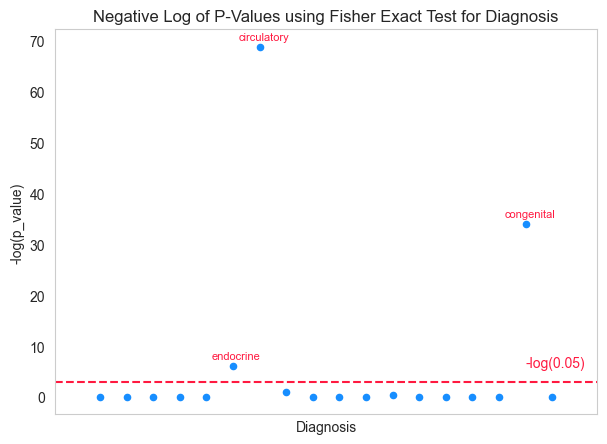

In [46]:
neg_log_p_values = [-np.log(p) for p in diagnosis_p_value_list]

plt.figure(figsize=(7, 5))
plt.scatter(list(all_diagnosis), neg_log_p_values, s=20, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Diagnosis')
plt.ylabel('-log(p_value)')
plt.xlabel('Diagnosis')
plt.xticks([])  # Hiding y-axis tick labels
plt.grid(False)
plt.margins(x=0.1)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(all_diagnosis) - 2, critical_value + 5, '-log(0.05)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > critical_value else 'black' for p_value in neg_log_p_values]

for i, (x, feature) in enumerate(zip(range(len(all_diagnosis)), all_diagnosis)):
    if neg_log_p_values[i] > critical_value:
        plt.text(x - 0.8, neg_log_p_values[i] + 2, feature, verticalalignment='center', color='#ff1940', fontsize=8)
    
plt.show()

(4235, 2)
(765, 2)


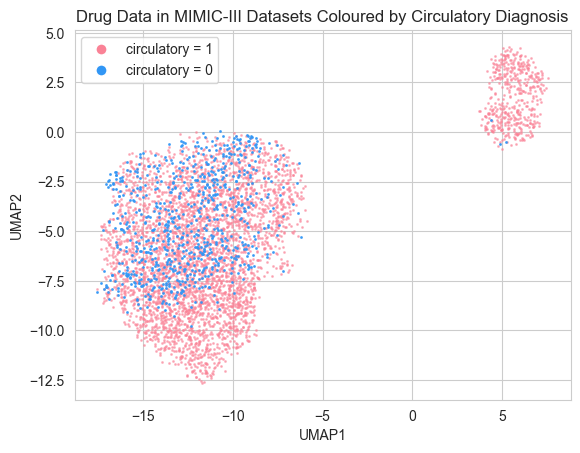

In [47]:
legend_elements = []

circulatory_patients = diagnosis[diagnosis['diagnosis'] == 'circulatory']['SUBJECT_ID'].unique()

final_pos_np = final_np[mimic_data['patientunitstayid'].isin(circulatory_patients)]
final_neg_np = final_np[~mimic_data['patientunitstayid'].isin(circulatory_patients)]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="circulatory = 1", color="#fa8296", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa8296", markersize=8, label="circulatory = 1")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="circulatory = 0", color="#3196f5", alpha=0.8
                   , s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#3196f5", markersize=8, label="circulatory = 0")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Circulatory Diagnosis')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=legend_elements)
plt.show()

In [48]:
# ACUTE RHEUMATIC FEVER (390 – 392.9) 
# CHRONIC RHEUMATIC HEART DISEASE (393 – 398.9)
# HYPERTENSIVE DISEASE (401 – 405.99)
# ISCHEMIC HEART DISEASE (410 – 414.9)
# PULMONARY CIRCULATION DISEASE (415 – 417.9)
# OTHER HEART DISEASE (420 – 429.9)
# CEREBROVASCULAR DISEASE (430 – 438.9)
# DISEASES OF ARTERIES, ARTERIOLES AND CAPILLARIES (440 – 448.9) 
# DISEASES OF VEINS AND LYMPHATICS, AND OTHER DISEASES OF CIRCULATORY SYSTEM (451 – 459.9)

def detailed_circulatory_icd_category(code):
    if code < 390 or code > 460:
        raise ValueError("Invalid circulatory ICD code")
    elif code < 393:
        return "rheumatic fever" # 风湿热
    elif code < 399:
        return "rheumatic heart disease" # 风湿性心脏病
    elif code < 406:
        return "hypertensive" # 高血压
    elif code < 415:
        return "ischemic heart disease" # 心脏缺血
    elif code < 418:
        return "pulmonary circulation" # 肺循环疾病
    elif code < 430:
        return "other heart disease" # 其他心脏病
    elif code < 439:
        return "cerebrovascular" # 脑血管
    elif code < 449:
        return "arteries" # 动脉
    else:
        return "lymphatics" # 淋巴
    
def circulatory_icd_category(code):
    
    icd_code = code[:3] + '.' + code[3:]
    
    if float(icd_code) < 390 or float(icd_code) > 460:
        print(icd_code)
        raise ValueError("Invalid circulatory ICD code")

    return detailed_circulatory_icd_category(float(icd_code))
    
circulatory_diagnosis_data = diagnosis[diagnosis['diagnosis'] == 'circulatory']
circulatory_diagnosis_data['circulatory_diagnosis'] = circulatory_diagnosis_data['ICD9_CODE'].apply(circulatory_icd_category)
circulatory_diagnosis_data.head()

/var/folders/wd/d0j10lq906x4lfc0bphzybd80000gn/T/ipykernel_45535/3848078837.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circulatory_diagnosis_data['circulatory_diagnosis'] = circulatory_diagnosis_data['ICD9_CODE'].apply(circulatory_icd_category)


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,diagnosis,circulatory_diagnosis
708,1610,124,138376,12.0,42833,circulatory,other heart disease
709,1611,124,138376,13.0,40390,circulatory,hypertensive
710,1612,124,138376,14.0,42731,circulatory,other heart disease
711,1613,124,138376,15.0,4280,circulatory,other heart disease
712,1614,124,138376,16.0,41400,circulatory,ischemic heart disease


In [49]:
all_circulatory_diagnosis = circulatory_diagnosis_data['circulatory_diagnosis'].unique()
circulatory_p_value_list = []
for diagnosis_type in all_circulatory_diagnosis:
    
    diagnosis_data = circulatory_diagnosis_data[circulatory_diagnosis_data['circulatory_diagnosis'] == diagnosis_type]
    diagnosis_patients = diagnosis_data['SUBJECT_ID'].unique()
    
    total_cluster_1 = len(mimic_cluster_1['patientunitstayid'].unique())
    total_cluster_2 = len(mimic_cluster_2['patientunitstayid'].unique())
    
    total_cluster_1_diagnosis = len(mimic_cluster_1[mimic_cluster_1['patientunitstayid'].isin(diagnosis_patients)])
    total_cluster_2_diagnosis = len(mimic_cluster_2[mimic_cluster_2['patientunitstayid'].isin(diagnosis_patients)])
    
    table = [[total_cluster_2_diagnosis, total_cluster_2 - total_cluster_2_diagnosis],
             [total_cluster_1_diagnosis, total_cluster_1 - total_cluster_1_diagnosis]]
    
    _, p_value = fisher_exact(table, alternative='greater')
    circulatory_p_value_list.append(p_value)
    print(f"Diagnosis Type: {diagnosis_type}, Table: {table}, P-Value: {p_value}")

Diagnosis Type: other heart disease, Table: [[341, 120], [2203, 2336]], P-Value: 2.1429876253902535e-26
Diagnosis Type: hypertensive, Table: [[328, 133], [2641, 1898]], P-Value: 2.5371439302613403e-08
Diagnosis Type: ischemic heart disease, Table: [[300, 161], [1233, 3306]], P-Value: 6.758850358561464e-58
Diagnosis Type: cerebrovascular, Table: [[33, 428], [672, 3867]], P-Value: 0.9999995832612221
Diagnosis Type: arteries, Table: [[94, 367], [479, 4060]], P-Value: 3.671420731792541e-09
Diagnosis Type: lymphatics, Table: [[99, 362], [999, 3540]], P-Value: 0.623571049708425
Diagnosis Type: rheumatic heart disease, Table: [[38, 423], [91, 4448]], P-Value: 2.7520800419971965e-11
Diagnosis Type: pulmonary circulation, Table: [[43, 418], [413, 4126]], P-Value: 0.4616287331746345
Diagnosis Type: rheumatic fever, Table: [[0, 461], [1, 4538]], P-Value: 1.0


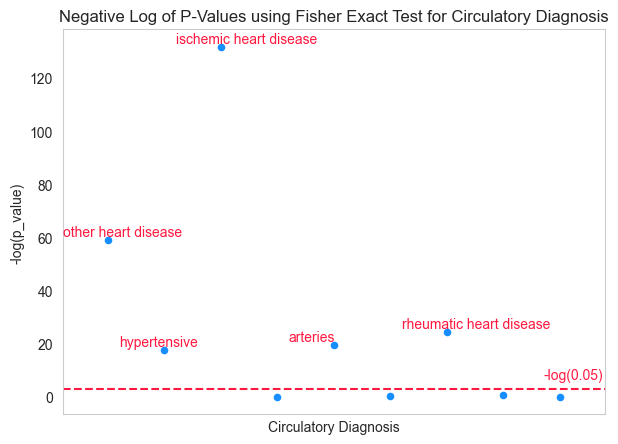

In [50]:
neg_log_p_values = [-np.log(p) for p in circulatory_p_value_list]

plt.figure(figsize=(7, 5))
plt.scatter(list(all_circulatory_diagnosis), neg_log_p_values, s=20, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Circulatory Diagnosis')
plt.ylabel('-log(p_value)')
plt.xlabel('Circulatory Diagnosis')
plt.xticks([])  # Hiding y-axis tick labels
plt.grid(False)
plt.margins(x=0.1)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(all_circulatory_diagnosis) - 1.3, critical_value + 8, '-log(0.05)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > critical_value else 'black' for p_value in neg_log_p_values]

for i, (x, feature) in enumerate(zip(range(len(all_circulatory_diagnosis)), all_circulatory_diagnosis)):
    if neg_log_p_values[i] > critical_value:
        plt.text(x - 0.8, neg_log_p_values[i] + 3, feature, verticalalignment='center', color='#ff1940', fontsize=10)
    
plt.show()

(1533, 2)
(3467, 2)


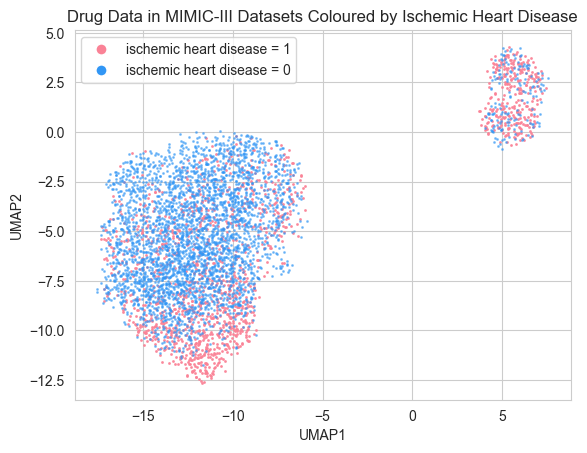

In [51]:
legend_elements = []

ischemic_patients = circulatory_diagnosis_data[circulatory_diagnosis_data['circulatory_diagnosis'] == "ischemic heart disease"]['SUBJECT_ID'].unique()

final_pos_np = final_np[mimic_data['patientunitstayid'].isin(ischemic_patients)]
final_neg_np = final_np[~mimic_data['patientunitstayid'].isin(ischemic_patients)]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="ischemic heart disease = 1", color="#fa8296", alpha=0.8, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa8296", markersize=8, label="ischemic heart disease = 1")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="ischemic heart disease = 0", color="#3196f5", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#3196f5", markersize=8, label="ischemic heart disease = 0")
legend_elements.append(legend_element)

plt.title(f'Drug Data in MIMIC-III Datasets Coloured by Ischemic Heart Disease')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=legend_elements)
plt.show()

## Procedure Feature

In [52]:
import pandas as pd

cpt_events = pd.read_csv('../data/mimic/CPTEVENTS.csv.gz')
cpt_events = cpt_events.dropna(subset=['SECTIONHEADER'])
cpt_events = cpt_events[cpt_events['SUBJECT_ID'].isin(mimic_data['patientunitstayid'].unique())]
cpt_events = cpt_events[cpt_events['HADM_ID'].isin(mimic_admissions['HADM_ID'].unique())]
cpt_events.head()

/var/folders/wd/d0j10lq906x4lfc0bphzybd80000gn/T/ipykernel_45535/2139589690.py:3: DtypeWarning: Columns (4,5,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  cpt_events = pd.read_csv('../data/mimic/CPTEVENTS.csv.gz')


,ROW_ID,SUBJECT_ID,HADM_ID,COSTCENTER,CHARTDATE,CPT_CD,CPT_NUMBER,CPT_SUFFIX,TICKET_ID_SEQ,SECTIONHEADER,SUBSECTIONHEADER,DESCRIPTION
163304,168911,28973,158953,ICU,NaN,99233,99233.0,NaN,10.0,Evaluation and management,Hospital inpatient services,NaN
163305,168912,28973,158953,ICU,NaN,99233,99233.0,NaN,11.0,Evaluation and management,Hospital inpatient services,NaN
163306,168913,28973,158953,ICU,NaN,99291,99291.0,NaN,12.0,Evaluation and management,Critical care services,NaN
163307,168914,28973,158953,ICU,NaN,31622,31622.0,NaN,13.0,Surgery,Respiratory system,NaN
163308,168915,28973,158953,ICU,NaN,99291,99291.0,NaN,14.0,Evaluation and management,Critical care services,NaN


In [53]:
all_procedures = cpt_events["SECTIONHEADER"].unique()
procedure_p_value_list = []

for procedures_type in all_procedures:
    
    procedures_data = cpt_events[cpt_events['SECTIONHEADER'] == procedures_type]
    procedures_patients = procedures_data['SUBJECT_ID'].unique()
    
    total_cluster_1 = len(mimic_cluster_1['patientunitstayid'].unique())
    total_cluster_2 = len(mimic_cluster_2['patientunitstayid'].unique())
    
    total_cluster_1_procedures = len(mimic_cluster_1[mimic_cluster_1['patientunitstayid'].isin(procedures_patients)])
    total_cluster_2_procedures = len(mimic_cluster_2[mimic_cluster_2['patientunitstayid'].isin(procedures_patients)])
    
    table = [[total_cluster_2_procedures, total_cluster_2 - total_cluster_2_procedures],
             [total_cluster_1_procedures, total_cluster_1 - total_cluster_1_procedures]]
    
    _, p_value = fisher_exact(table, alternative='greater')
    procedure_p_value_list.append(p_value)
    print(f"procedures Type: {procedures_type}, Table: {table}, P-Value: {p_value}")

procedures Type: Evaluation and management, Table: [[341, 120], [4325, 214]], P-Value: 1.0
procedures Type: Surgery, Table: [[455, 6], [1920, 2619]], P-Value: 4.1029011875376065e-147
procedures Type: Medicine, Table: [[283, 178], [1881, 2658]], P-Value: 1.835896075504522e-16
procedures Type: Radiology, Table: [[8, 453], [272, 4267]], P-Value: 0.9999959759205236
procedures Type: Pathology and laboratory, Table: [[1, 460], [11, 4528]], P-Value: 0.6871767921615033
procedures Type: Anesthesia, Table: [[1, 460], [53, 4486]], P-Value: 0.9947670055820093
procedures Type: Emerging technology, Table: [[1, 460], [4, 4535]], P-Value: 0.3836000159408193


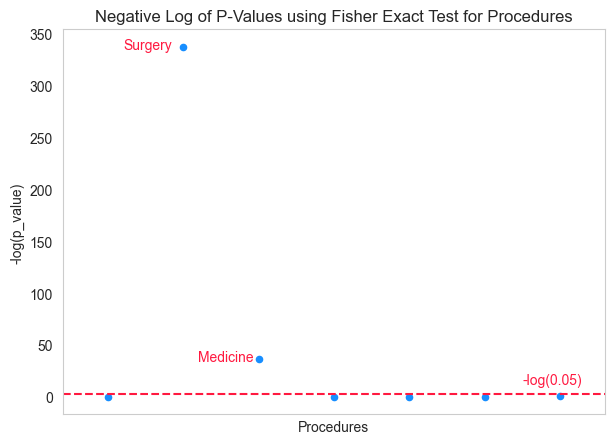

In [54]:
neg_log_p_values = [-np.log(p) for p in procedure_p_value_list]

plt.figure(figsize=(7, 5))
plt.scatter(list(all_procedures), neg_log_p_values, s=20, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Procedures')
plt.ylabel('-log(p_value)')
plt.xlabel('Procedures')
plt.xticks([])  # Hiding y-axis tick labels
plt.grid(False)
plt.margins(x=0.1)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(all_procedures) - 1.5, critical_value + 20, '-log(0.05)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > critical_value else 'black' for p_value in neg_log_p_values]

for i, (x, feature) in enumerate(zip(range(len(all_procedures)), all_procedures)):
    if neg_log_p_values[i] > critical_value:
        plt.text(x - 0.8, neg_log_p_values[i] + 2, feature, verticalalignment='center', color='#ff1940')
    
plt.show()

(2375, 2)
(2625, 2)


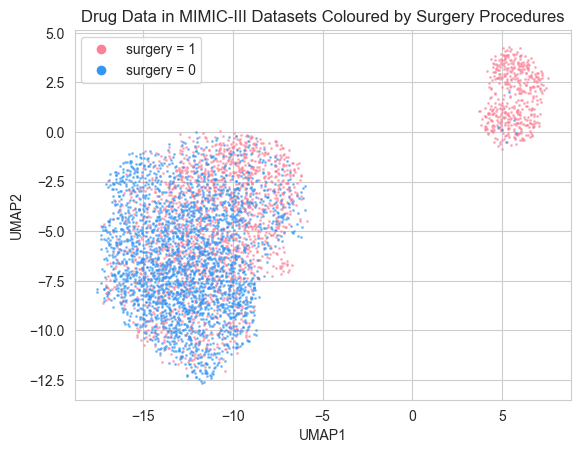

In [55]:
legend_elements = []

surgery_patients = cpt_events[cpt_events['SECTIONHEADER'] == 'Surgery']['SUBJECT_ID'].unique()

final_pos_np = final_np[mimic_data['patientunitstayid'].isin(surgery_patients)]
final_neg_np = final_np[~mimic_data['patientunitstayid'].isin(surgery_patients)]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="surgery = 1", color="#fa8296", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa8296", markersize=8, label="surgery = 1")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="surgery = 0", color="#3196f5", alpha=0.5
                   , s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#3196f5", markersize=8, label="surgery = 0")
legend_elements.append(legend_element)

plt.title('Drug Data in MIMIC-III Datasets Coloured by Surgery Procedures')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=legend_elements)
plt.show()

In [56]:
surgery_subcategories = cpt_events[cpt_events['SECTIONHEADER'] == 'Surgery']['SUBSECTIONHEADER'].unique()
surgery_p_value_list = []

for subcategory in surgery_subcategories:
    
    procedures_data = cpt_events[cpt_events['SUBSECTIONHEADER'] == subcategory]
    procedures_patients = procedures_data['SUBJECT_ID'].unique()
    
    total_cluster_1 = len(mimic_cluster_1['patientunitstayid'].unique())
    total_cluster_2 = len(mimic_cluster_2['patientunitstayid'].unique())
    
    total_cluster_1_procedures = len(mimic_cluster_1[mimic_cluster_1['patientunitstayid'].isin(procedures_patients)])
    total_cluster_2_procedures = len(mimic_cluster_2[mimic_cluster_2['patientunitstayid'].isin(procedures_patients)])
    
    table = [[total_cluster_2_procedures, total_cluster_2 - total_cluster_2_procedures],
             [total_cluster_1_procedures, total_cluster_1 - total_cluster_1_procedures]]
    
    _, p_value = fisher_exact(table, alternative='greater')
    surgery_p_value_list.append(p_value)
    print(f"procedures Type: {subcategory}, Table: {table}, P-Value: {p_value}")

procedures Type: Respiratory system, Table: [[21, 440], [557, 3982]], P-Value: 0.9999999873628317
procedures Type: Digestive system, Table: [[7, 454], [442, 4097]], P-Value: 0.9999999999996179
procedures Type: Cardiovascular system, Table: [[454, 7], [842, 3697]], P-Value: 8.542647758119395e-283
procedures Type: Hemic and lymphatic systems, Table: [[0, 461], [70, 4469]], P-Value: 1.0
procedures Type: Nervous system, Table: [[5, 456], [356, 4183]], P-Value: 0.9999999999808262
procedures Type: Musculoskeletal system, Table: [[4, 457], [363, 4176]], P-Value: 0.9999999999989301
procedures Type: Female genital system, Table: [[0, 461], [21, 4518]], P-Value: 1.0
procedures Type: Urinary system, Table: [[2, 459], [41, 4498]], P-Value: 0.9170904505308042
procedures Type: Integumentary system, Table: [[5, 456], [112, 4427]], P-Value: 0.9868790656893529
procedures Type: Mediastinum and diaphragm, Table: [[0, 461], [14, 4525]], P-Value: 1.0
procedures Type: Maternity care and delivery, Table: [[0

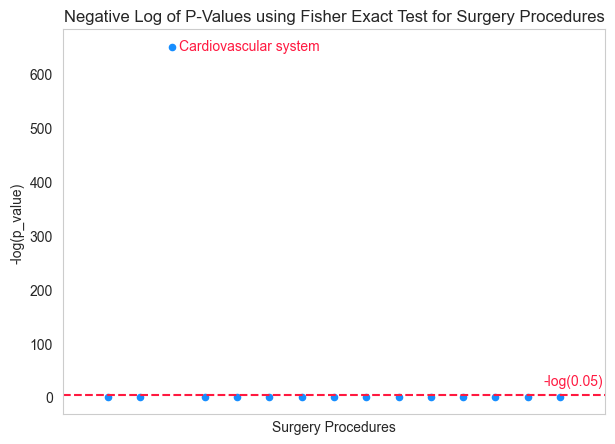

In [57]:
neg_log_p_values = [-np.log(p) for p in surgery_p_value_list]

plt.figure(figsize=(7, 5))
plt.scatter(list(surgery_subcategories), neg_log_p_values, s=20, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Surgery Procedures')
plt.ylabel('-log(p_value)')
plt.xlabel('Surgery Procedures')
plt.xticks([])  # Hiding y-axis tick labels
plt.grid(False)
plt.margins(x=0.1)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(surgery_subcategories) - 1.5, critical_value + 40, '-log(0.05)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > critical_value else 'black' for p_value in neg_log_p_values]

for i, (x, feature) in enumerate(zip(range(len(surgery_subcategories)), surgery_subcategories)):
    if neg_log_p_values[i] > critical_value:
        plt.text(x + 0.2, neg_log_p_values[i] + 2, feature, verticalalignment='center', color='#ff1940')
    
plt.show()

(1296, 2)
(3704, 2)


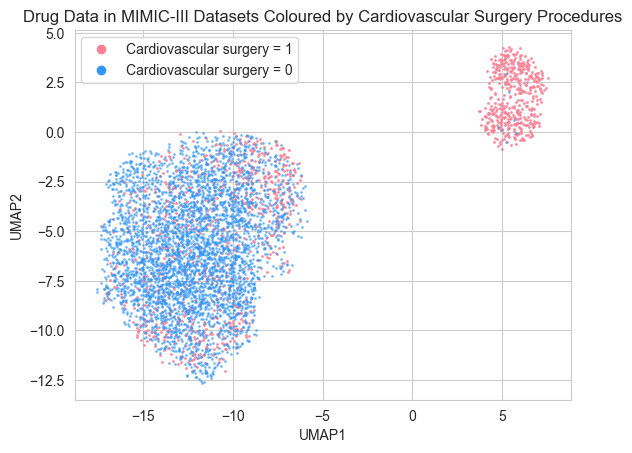

In [58]:
legend_elements = []

surgery_patients = cpt_events[cpt_events['SUBSECTIONHEADER'] == "Cardiovascular system"]['SUBJECT_ID'].unique()

final_pos_np = final_np[mimic_data['patientunitstayid'].isin(surgery_patients)]
final_neg_np = final_np[~mimic_data['patientunitstayid'].isin(surgery_patients)]

print(final_pos_np.shape)
print(final_neg_np.shape)

plot = plt.scatter(final_pos_np[:, 0], final_pos_np[:, 1], label="Cardiovascular surgery = 1", color="#fa8296", alpha=0.8, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#fa8296", markersize=8, label="Cardiovascular surgery = 1")
legend_elements.append(legend_element)

plot = plt.scatter(final_neg_np[:, 0], final_neg_np[:, 1], label="Cardiovascular surgery = 0", color="#3196f5", alpha=0.5, s=1.2)
legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#3196f5", markersize=8, label="Cardiovascular surgery = 0")
legend_elements.append(legend_element)

plt.title(f'Drug Data in MIMIC-III Datasets Coloured by Cardiovascular Surgery Procedures')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=legend_elements)
plt.show()

## Admission Type v.s. Procedures

In [59]:
mimic_admissions = pd.read_csv('../data/mimic/ADMISSIONS.csv')
mimic_admissions = mimic_admissions[mimic_admissions['SUBJECT_ID'].isin(mimic_data['patientunitstayid'].unique())]
mimic_admissions = mimic_admissions.sort_values('ADMITTIME').drop_duplicates('SUBJECT_ID', keep='last')
mimic_admissions['ADMISSION_TYPE'] = mimic_admissions['ADMISSION_TYPE'].replace('URGENT', 'EMERGENCY')
unique_admission_types = mimic_admissions['ADMISSION_TYPE'].unique()
unique_admission_types

array(['EMERGENCY', 'ELECTIVE'], dtype=object)

In [60]:
all_procedures = cpt_events["SECTIONHEADER"].unique()
procedure_p_value_list = []

for procedures_type in all_procedures:
    
    procedures_data = cpt_events[cpt_events['SECTIONHEADER'] == procedures_type]
    procedures_patients = procedures_data['SUBJECT_ID'].unique()
    
    emergency_admission_patients = (mimic_admissions[mimic_admissions["ADMISSION_TYPE"] == "EMERGENCY"])["SUBJECT_ID"].unique()
    elective_admission_patients = (mimic_admissions[mimic_admissions["ADMISSION_TYPE"] == "ELECTIVE"])["SUBJECT_ID"].unique()
    
    total_cluster_1 = len(emergency_admission_patients)
    total_cluster_2 = len(elective_admission_patients)
    
    total_cluster_1_procedures = len(set(emergency_admission_patients).intersection(set(procedures_patients)))
    total_cluster_2_procedures = len(set(elective_admission_patients).intersection(set(procedures_patients)))
    
    table = [[total_cluster_2_procedures, total_cluster_2 - total_cluster_2_procedures],
             [total_cluster_1_procedures, total_cluster_1 - total_cluster_1_procedures]]
    
    _, p_value = fisher_exact(table, alternative='greater')
    procedure_p_value_list.append(p_value)
    print(f"procedures Type: {procedures_type}, Table: {table}, P-Value: {p_value}")

procedures Type: Evaluation and management, Table: [[588, 179], [4078, 155]], P-Value: 1.0
procedures Type: Surgery, Table: [[634, 133], [1741, 2492]], P-Value: 1.1792186895485814e-105
procedures Type: Medicine, Table: [[338, 429], [1826, 2407]], P-Value: 0.3299867489329219
procedures Type: Radiology, Table: [[32, 735], [248, 3985]], P-Value: 0.9778981449696126
procedures Type: Pathology and laboratory, Table: [[1, 766], [11, 4222]], P-Value: 0.864762014476211
procedures Type: Anesthesia, Table: [[35, 732], [19, 4214]], P-Value: 1.585878359437342e-16
procedures Type: Emerging technology, Table: [[5, 762], [0, 4233]], P-Value: 8.400831873800908e-05


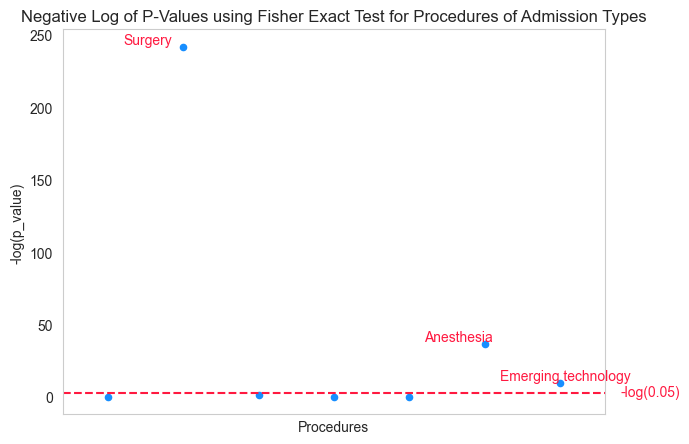

In [61]:
neg_log_p_values = [-np.log(p) for p in procedure_p_value_list]

plt.figure(figsize=(7, 5))
plt.scatter(list(all_procedures), neg_log_p_values, s=20, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Procedures of Admission Types')
plt.ylabel('-log(p_value)')
plt.xlabel('Procedures')
plt.xticks([])  # Hiding y-axis tick labels
plt.grid(False)
plt.margins(x=0.1)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(all_procedures)-0.2, critical_value + 5, '-log(0.05)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > critical_value else 'black' for p_value in neg_log_p_values]

for i, (x, feature) in enumerate(zip(range(len(all_procedures)), all_procedures)):
    if neg_log_p_values[i] > critical_value:
        plt.text(x - 0.8, neg_log_p_values[i] + 5, feature, verticalalignment='center', color='#ff1940')
    
plt.show()

In [62]:
surgery_subcategories = cpt_events[cpt_events['SECTIONHEADER'] == 'Surgery']['SUBSECTIONHEADER'].unique()
surgery_p_value_list = []

for subcategory in surgery_subcategories:
    
    procedures_data = cpt_events[cpt_events['SUBSECTIONHEADER'] == subcategory]
    procedures_patients = procedures_data['SUBJECT_ID'].unique()
    
    emergency_admission_patients = (mimic_admissions[mimic_admissions["ADMISSION_TYPE"] == "EMERGENCY"])["SUBJECT_ID"].unique()
    elective_admission_patients = (mimic_admissions[mimic_admissions["ADMISSION_TYPE"] == "ELECTIVE"])["SUBJECT_ID"].unique()
    
    total_cluster_1 = len(emergency_admission_patients)
    total_cluster_2 = len(elective_admission_patients)
    
    total_cluster_1_procedures = len(set(emergency_admission_patients).intersection(set(procedures_patients)))
    total_cluster_2_procedures = len(set(elective_admission_patients).intersection(set(procedures_patients)))
    
    table = [[total_cluster_2_procedures, total_cluster_2 - total_cluster_2_procedures],
             [total_cluster_1_procedures, total_cluster_1 - total_cluster_1_procedures]]
    
    _, p_value = fisher_exact(table, alternative='greater')
    surgery_p_value_list.append(p_value)
    print(f"procedures Type: {subcategory}, Table: {table}, P-Value: {p_value}")

procedures Type: Respiratory system, Table: [[78, 689], [500, 3733]], P-Value: 0.916323977351026
procedures Type: Digestive system, Table: [[96, 671], [353, 3880]], P-Value: 0.00021714670136466148
procedures Type: Cardiovascular system, Table: [[407, 360], [889, 3344]], P-Value: 1.712064251164084e-69
procedures Type: Hemic and lymphatic systems, Table: [[32, 735], [38, 4195]], P-Value: 1.2242624322376259e-09
procedures Type: Nervous system, Table: [[86, 681], [275, 3958]], P-Value: 7.502056107936007e-06
procedures Type: Musculoskeletal system, Table: [[52, 715], [315, 3918]], P-Value: 0.7626256436629977
procedures Type: Female genital system, Table: [[11, 756], [10, 4223]], P-Value: 8.292805931773252e-05
procedures Type: Urinary system, Table: [[19, 748], [24, 4209]], P-Value: 5.65595319566421e-06
procedures Type: Integumentary system, Table: [[31, 736], [86, 4147]], P-Value: 0.0011438660172196878
procedures Type: Mediastinum and diaphragm, Table: [[5, 762], [9, 4224]], P-Value: 0.0505

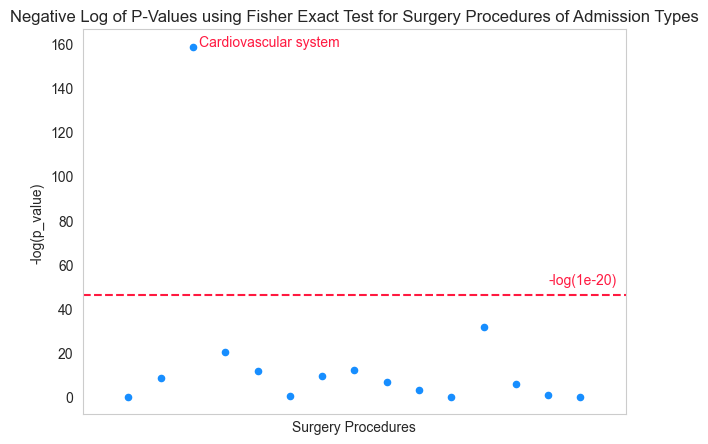

In [63]:
neg_log_p_values = [-np.log(p) for p in surgery_p_value_list]

plt.figure(figsize=(7, 5))
plt.scatter(list(surgery_subcategories), neg_log_p_values, s=20, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Surgery Procedures of Admission Types')
plt.ylabel('-log(p_value)')
plt.xlabel('Surgery Procedures')
plt.xticks([])  # Hiding y-axis tick labels
plt.grid(False)
plt.margins(x=0.1)

critical_value = -np.log(1e-20)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(surgery_subcategories) - 2, critical_value + 10, '-log(1e-20)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > critical_value else 'black' for p_value in neg_log_p_values]

for i, (x, feature) in enumerate(zip(range(len(surgery_subcategories)), surgery_subcategories)):
    if neg_log_p_values[i] > critical_value:
        plt.text(x + 0.2, neg_log_p_values[i] + 2, feature, verticalalignment='center', color='#ff1940')
    
plt.show()

## Admission Type v.s. Drugs

In [64]:
drug_features = mimic_data.columns[3:-31]
drug_p_value_list = []
for feature in drug_features:
    
    mimic_drug_taken_patients = mimic_data[mimic_data[feature] == 1.0]['patientunitstayid'].unique()
    
    emergency_admission_patients = (mimic_admissions[mimic_admissions["ADMISSION_TYPE"] == "EMERGENCY"])["SUBJECT_ID"].unique()
    elective_admission_patients = (mimic_admissions[mimic_admissions["ADMISSION_TYPE"] == "ELECTIVE"])["SUBJECT_ID"].unique()
    
    total_cluster_1 = len(emergency_admission_patients)
    total_cluster_2 = len(elective_admission_patients)
    
    total_cluster_1_drugs = len(set(emergency_admission_patients).intersection(set(mimic_drug_taken_patients)))
    total_cluster_2_drugs = len(set(elective_admission_patients).intersection(set(mimic_drug_taken_patients)))
    
    table = [[total_cluster_2_drugs, total_cluster_2 - total_cluster_2_drugs],
             [total_cluster_1_drugs, total_cluster_1 - total_cluster_1_drugs]]
    
    _, p_value = fisher_exact(table, alternative='greater')
    drug_p_value_list.append(p_value)
    
    print(f"Feature: {feature}, P-Value: {p_value}")

Feature: acetamin, P-Value: 3.7132167915814248e-31
Feature: biotene, P-Value: 1.0
Feature: compazine, P-Value: 1.0
Feature: ferrous, P-Value: 0.6409488797510724
Feature: imdur, P-Value: 1.0
Feature: lidocaine, P-Value: 2.640055768925619e-53
Feature: milk of magnesia, P-Value: 6.880789167250026e-156
Feature: nystatin, P-Value: 0.9997811364722446
Feature: prochlorperazine, P-Value: 0.9921713148089323
Feature: tamsulosin, P-Value: 0.12882161845301082
Feature: advair diskus, P-Value: 0.27133863980412776
Feature: bisacodyl, P-Value: 0.030781956673386165
Feature: coreg, P-Value: 1.0
Feature: flagyl, P-Value: 0.9999999998393031
Feature: influenza vac, P-Value: 0.17985806771019827
Feature: lipitor, P-Value: 1.0
Feature: mineral, P-Value: 0.9896567515538666
Feature: omeprazole, P-Value: 0.9976079847885615
Feature: promethazine, P-Value: 0.004700384003483882
Feature: thiamine, P-Value: 0.999999999999981
Feature: albumin, P-Value: 1.4505242112447542e-67
Feature: bumetanide, P-Value: 0.09056392794

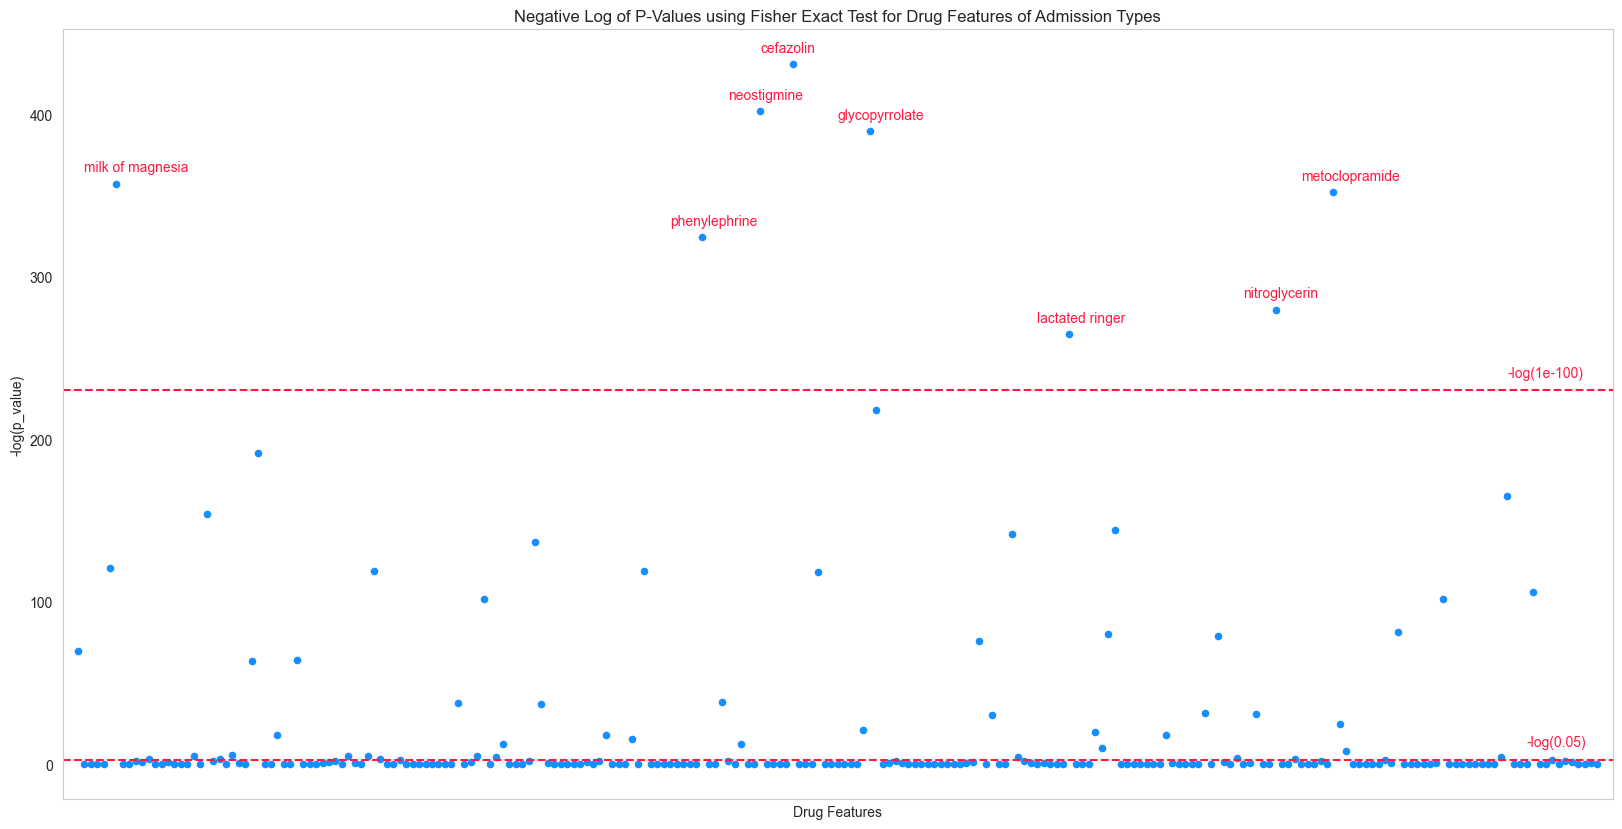

In [65]:
neg_log_p_values = [-np.log(p) for p in drug_p_value_list]

plt.figure(figsize=(20, 10))
plt.scatter(list(drug_features), neg_log_p_values, s=20, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Drug Features of Admission Types')
plt.ylabel('-log(p_value)')
plt.xlabel('Drug Features')
plt.xticks([])  # Hiding y-axis tick labels
plt.grid(False)
plt.margins(x=0.01)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(drug_features) - 12, critical_value + 15, '-log(0.05)', verticalalignment='top', color='#ff1940')

very_critical_value = -np.log(1e-100)
plt.axhline(y=very_critical_value, color='#ff1940', linestyle='--')
plt.text(len(drug_features) - 15, very_critical_value + 15, '-log(1e-100)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > very_critical_value else 'black' for p_value in neg_log_p_values]

for i, (x, feature) in enumerate(zip(range(len(drug_features)), drug_features)):
    if neg_log_p_values[i] > very_critical_value:
        plt.text(x - 5, neg_log_p_values[i] + 10, feature, verticalalignment='center', color='#ff1940', fontsize=10)
    
plt.show()

## Cardiovascular Surgery v.s. Drugs

In [66]:
drug_features = mimic_data.columns[3:-31]
drug_p_value_list = []
for feature in drug_features:
    
    mimic_drug_taken_patients = mimic_data[mimic_data[feature] == 1.0]['patientunitstayid'].unique()
    
    cardio_procedures_data = cpt_events[cpt_events['SUBSECTIONHEADER'] == "Cardiovascular system"]
    cardio_procedures_patients = cardio_procedures_data['SUBJECT_ID'].unique()
    
    non_cardio_procedures_data = cpt_events[cpt_events['SUBSECTIONHEADER'] != "Cardiovascular system"]
    non_cardio_procedures_patients = non_cardio_procedures_data['SUBJECT_ID'].unique()
    
    total_cluster_1 = len(non_cardio_procedures_patients)
    total_cluster_2 = len(cardio_procedures_patients)
    
    total_cluster_1_drugs = len(set(non_cardio_procedures_patients).intersection(set(mimic_drug_taken_patients)))
    total_cluster_2_drugs = len(set(cardio_procedures_patients).intersection(set(mimic_drug_taken_patients)))
    
    table = [[total_cluster_2_drugs, total_cluster_2 - total_cluster_2_drugs],
             [total_cluster_1_drugs, total_cluster_1 - total_cluster_1_drugs]]
    
    _, p_value = fisher_exact(table, alternative='greater')
    drug_p_value_list.append(p_value)
    
    print(f"Feature: {feature}, P-Value: {p_value}")

Feature: acetamin, P-Value: 1.296772685540866e-08
Feature: biotene, P-Value: 1.0
Feature: compazine, P-Value: 1.0
Feature: ferrous, P-Value: 0.8739178327126647
Feature: imdur, P-Value: 1.0
Feature: lidocaine, P-Value: 1.2848614424600098e-38
Feature: milk of magnesia, P-Value: 2.13424104927406e-92
Feature: nystatin, P-Value: 0.19228305938215023
Feature: prochlorperazine, P-Value: 0.9999839721240125
Feature: tamsulosin, P-Value: 0.3157811090279937
Feature: advair diskus, P-Value: 0.3809192478280007
Feature: bisacodyl, P-Value: 0.8378201026872305
Feature: coreg, P-Value: 1.0
Feature: flagyl, P-Value: 0.6237829477173792
Feature: influenza vac, P-Value: 0.007305250548370409
Feature: lipitor, P-Value: 1.0
Feature: mineral, P-Value: 0.99066637389261
Feature: omeprazole, P-Value: 0.9399880801593585
Feature: promethazine, P-Value: 0.9908672876281887
Feature: thiamine, P-Value: 0.9694563902142186
Feature: albumin, P-Value: 1.3093755658986173e-36
Feature: bumetanide, P-Value: 0.5726117994187135
F

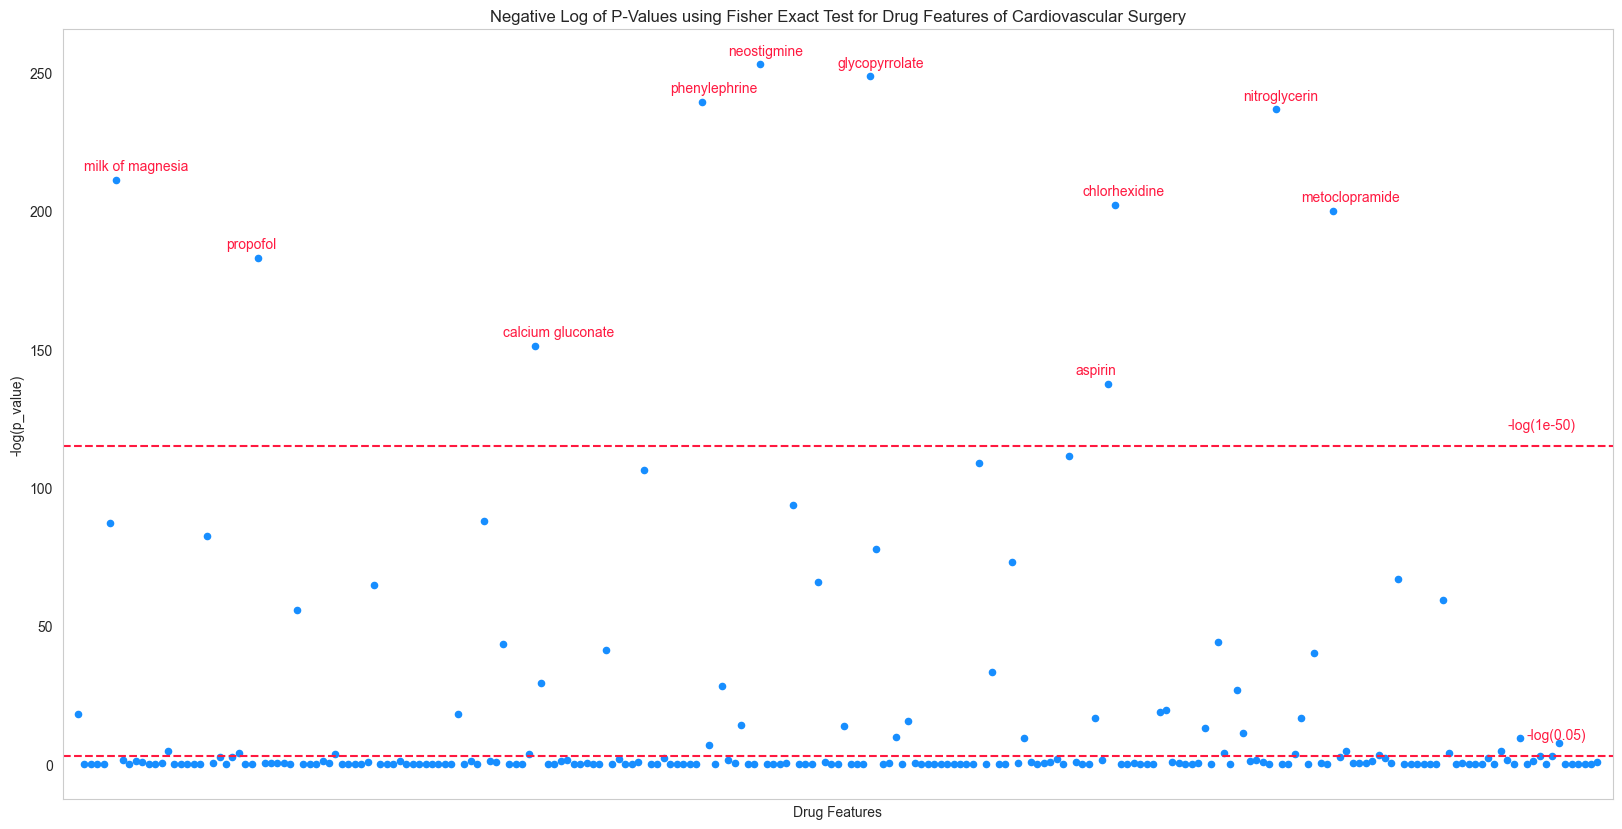

In [67]:
neg_log_p_values = [-np.log(p) for p in drug_p_value_list]

plt.figure(figsize=(20, 10))
plt.scatter(list(drug_features), neg_log_p_values, s=20, color='#178eff')
plt.title('Negative Log of P-Values using Fisher Exact Test for Drug Features of Cardiovascular Surgery')
plt.ylabel('-log(p_value)')
plt.xlabel('Drug Features')
plt.xticks([])  # Hiding y-axis tick labels
plt.grid(False)
plt.margins(x=0.01)

critical_value = -np.log(0.05)
plt.axhline(y=critical_value, color='#ff1940', linestyle='--')
plt.text(len(drug_features) - 12, critical_value + 10, '-log(0.05)', verticalalignment='top', color='#ff1940')

very_critical_value = -np.log(1e-50)
plt.axhline(y=very_critical_value, color='#ff1940', linestyle='--')
plt.text(len(drug_features) - 15, very_critical_value + 10, '-log(1e-50)', verticalalignment='top', color='#ff1940')

ticks_color = ['red' if p_value > very_critical_value else 'black' for p_value in neg_log_p_values]

for i, (x, feature) in enumerate(zip(range(len(drug_features)), drug_features)):
    if neg_log_p_values[i] > very_critical_value:
        plt.text(x - 5, neg_log_p_values[i] + 5, feature, verticalalignment='center', color='#ff1940', fontsize=10)
    
plt.show()